In [1]:
x=1

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [3]:
import SEACells

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.dpi'] = 100

In [6]:
def plot_sea_cells(
    ad,
    color_df,
    color_key,
    key="X_umap",
    title="Metacell Assignments",
    save_as=None,
    show=True,
    cmap="Set2",
    figsize=(5, 5),
    SEACell_size=20,
    cell_size=10,
):
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    mcs = umap.groupby("SEACell").mean()
    mcs = mcs.join(color_df)
    mcs = mcs.reset_index()
    # plt.figure(figsize=figsize)
    
    fig, ax = plt.subplots()
    sns.scatterplot(
        x=0, y=1, color="gray", data=umap, s=cell_size, cmap=cmap, legend=None
    )
    g = sns.scatterplot(
        x=0,
        y=1,
        s=SEACell_size,
        hue=f"{color_key}",
        data=mcs,
        cmap=cmap,
        edgecolor="black",
        linewidth=1,
        legend=None,
    )
    #g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(f'Average {color_key} expression per meta cell.')
    norm = plt.Normalize(mcs[f'{color_key}'].min(), mcs[f'{color_key}'].max())
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
    ax.figure.colorbar(sm, cax=cax, label=f"{color_key}")
    plt.show()

# load data + plots

In [8]:
adata = sc.read('../data/multigrate_mil/hlca_healthy_ipf_embed_balanced/b2e8c62cf5_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [9]:
adata.obsm['X'] = adata.X.copy()

In [10]:
adata.obs['cell_attn'] = np.mean(adata.obs[['cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4']], axis=1)

In [11]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [12]:
np.unique(adata.obs['lung_condition_coarse'])

array(['Healthy', 'IPF'], dtype=object)

In [13]:
healthy = adata[adata.obs['lung_condition_coarse'] == 'Healthy'].copy()
ipf = adata[adata.obs['lung_condition_coarse'] == 'IPF'].copy()

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


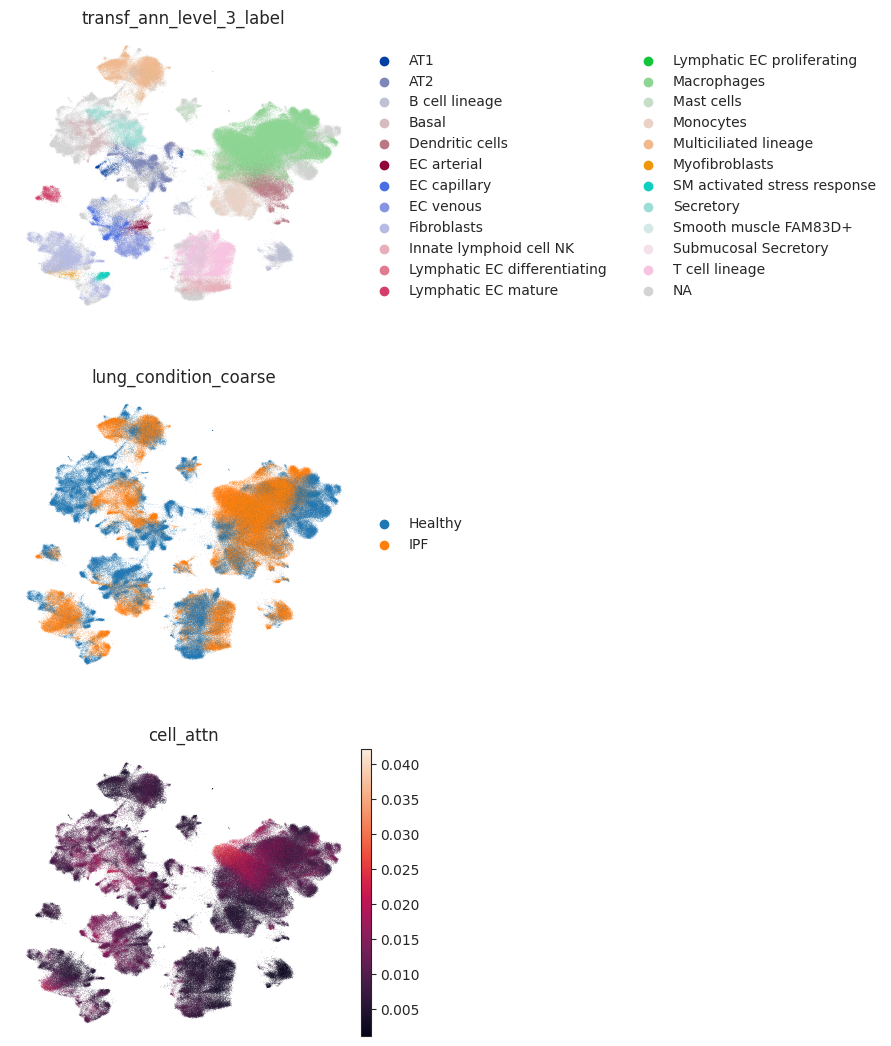

In [14]:
sc.pl.umap(adata, color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn'], ncols=1, frameon=False)

# Random subset

In [14]:
sc.pp.subsample(healthy, n_obs=10000)
sc.pp.subsample(ipf, n_obs=10000)
adata = ad.concat([healthy, ipf])
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

# Subset IPF to top 10k cells with highest attn scores

In [15]:
ipf_top = adata[adata.obs['lung_condition_coarse'] == 'IPF'].copy()

In [16]:
ipf_top

AnnData object with n_obs × n_vars = 239952 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [17]:
ipf_top = ipf_top[ipf_top.obs[['cell_attn']].sort_values(by='cell_attn', ascending=False).index][:10000]
ipf_top

View of AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_a

In [18]:
sc.pp.subsample(ipf_top, fraction=1)
ipf_top

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

# healthy

In [19]:
healthy

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [20]:
## User defined parameters

## Core parameters 
n_SEACells = 100
build_kernel_on = 'X' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [21]:
model = SEACells.core.SEACells(
    healthy, 
    build_kernel_on=build_kernel_on, 
    n_SEACells=n_SEACells, 
    n_waypoint_eigs=n_waypoint_eigs,
    convergence_epsilon = 1e-5
)

Welcome to SEACells!


In [22]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/10000 [00:00<?, ?it/s]

Constructing CSR matrix...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


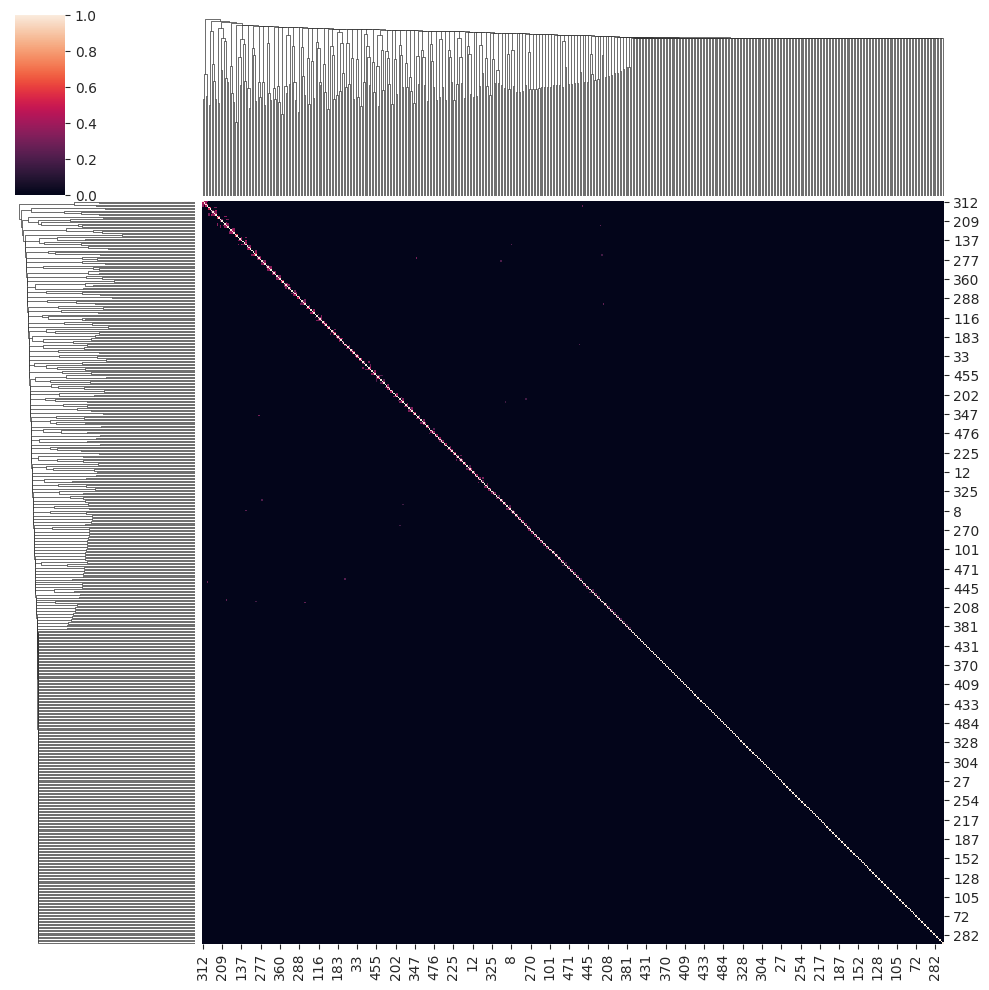

In [23]:
sns.clustermap(M.toarray()[:500,:500])

In [24]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X
Computing diffusion components from X for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 91 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 19/19 [00:00<00:00, 119.61it/s]

Selecting 9 cells from greedy initialization.


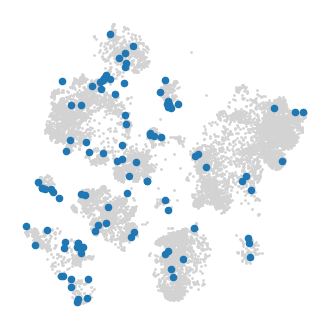

In [25]:
# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(healthy, model)

In [26]:
%%time

model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.00178
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Starting iteration 40.
Completed iteration 40.
Starting iteration 50.
Completed iteration 50.
Converged after 50 iterations.
CPU times: user 11min 48s, sys: 12min 16s, total: 24min 4s
Wall time: 7min 58s


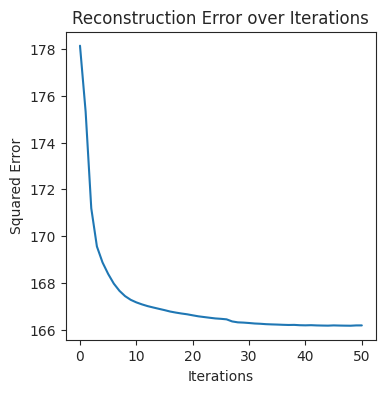

In [27]:
# Check for convergence 
model.plot_convergence()

In [28]:
healthy.write('../data/analysis/hlca_healthy_ipf_embed_balanced/healthy_random_subset10k_seacells.h5ad')

/tmp/ipykernel_1364634/2761727437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)


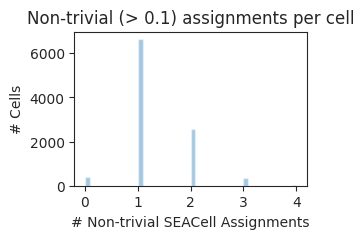

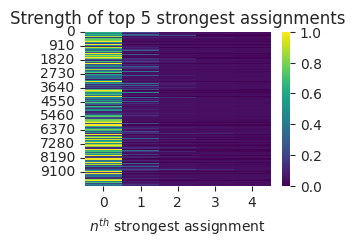

In [29]:
plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

In [30]:
labels,weights = model.get_soft_assignments()

In [31]:
mean_attn_score_per_seacell = healthy.obs[['cell_attn', 'SEACell']].groupby('SEACell').agg('mean')
mean_attn_score_per_seacell

cell_attn
SEACell              
SEACell-0    0.004393
SEACell-1    0.006094
SEACell-2    0.008268
SEACell-3    0.009804
SEACell-4    0.007566
...               ...
SEACell-95   0.006358
SEACell-96   0.007766
SEACell-97   0.011820
SEACell-98   0.009615
SEACell-99   0.006550

[100 rows x 1 columns]

In [32]:
SEACell_ad = SEACells.core.summarize_by_SEACell(healthy, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 100/100 [00:01<00:00, 63.58it/s]


AnnData object with n_obs × n_vars = 100 × 30
    layers: 'raw'

In [33]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


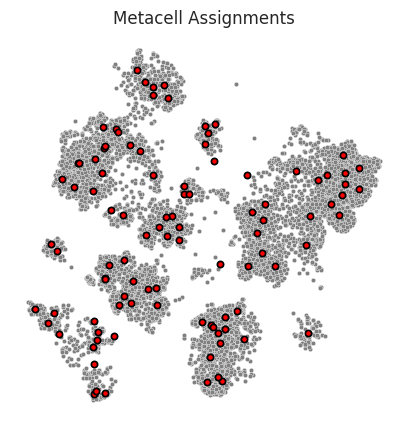

In [34]:
SEACells.plot.plot_2D(healthy, key='X_umap', colour_metacells=False)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


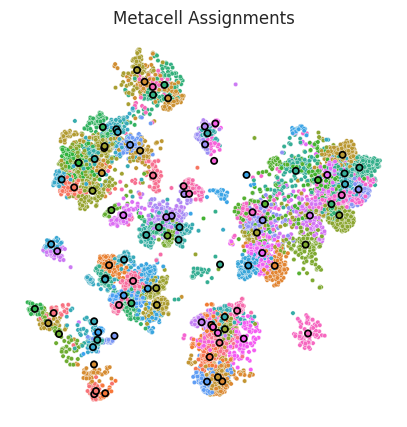

In [35]:
SEACells.plot.plot_2D(healthy, key='X_umap', colour_metacells=True)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/SEACells/SEACells/plot.py:130: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby("SEACell").count().iloc[:, 0], bins=bins)


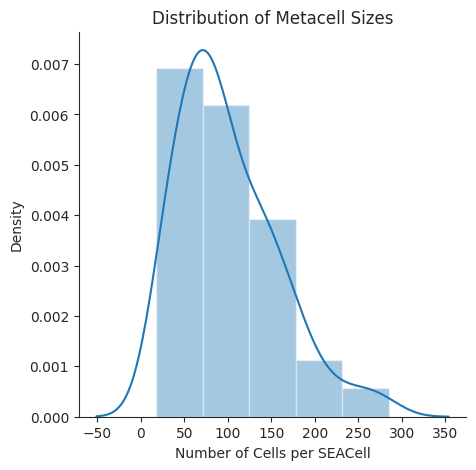

size
SEACell         
SEACell-0    156
SEACell-1     30
SEACell-2     25
SEACell-3     25
SEACell-4    167
...          ...
SEACell-95    73
SEACell-96    60
SEACell-97    82
SEACell-98   228
SEACell-99    83

[100 rows x 1 columns]

In [36]:
SEACells.plot.plot_SEACell_sizes(healthy, bins=5)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


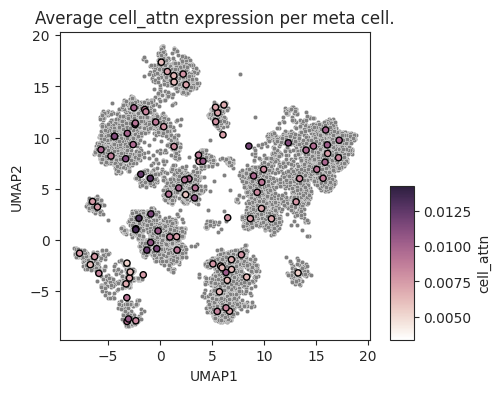

In [37]:
plot_sea_cells(healthy, mean_attn_score_per_seacell,'cell_attn')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


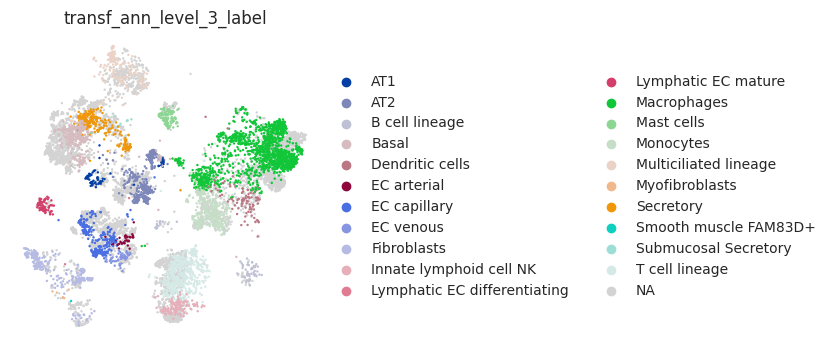

In [38]:
sc.pl.umap(healthy, color=['transf_ann_level_3_label'], ncols=1, frameon=False)

In [39]:
healthy.write('../data/analysis/hlca_healthy_ipf_embed_balanced/healthy_random_subset10k_seacells.h5ad')

# ipf

In [40]:
ipf

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [41]:
## User defined parameters

## Core parameters 
n_SEACells = 100
build_kernel_on = 'X' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [42]:
model = SEACells.core.SEACells(
    ipf, 
    build_kernel_on=build_kernel_on, 
    n_SEACells=n_SEACells, 
    n_waypoint_eigs=n_waypoint_eigs,
    convergence_epsilon = 1e-5
)

Welcome to SEACells!


In [43]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/10000 [00:00<?, ?it/s]

Constructing CSR matrix...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


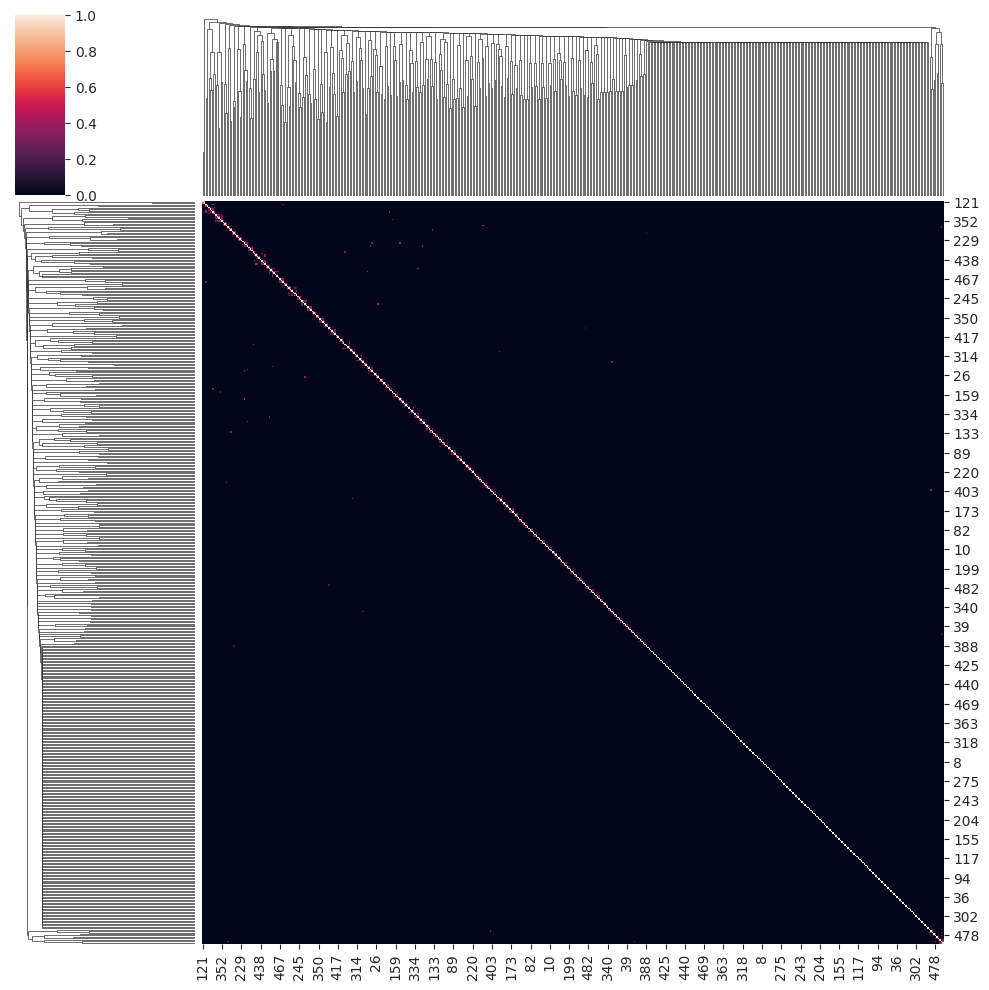

In [44]:
sns.clustermap(M.toarray()[:500,:500])

In [45]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X
Computing diffusion components from X for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 91 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 19/19 [00:00<00:00, 111.11it/s]

Selecting 9 cells from greedy initialization.


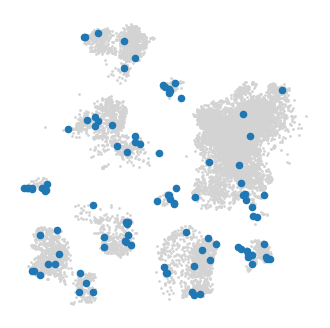

In [46]:
# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ipf, model)

In [47]:
%%time

model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.00180
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 22 iterations.
CPU times: user 5min 41s, sys: 5min 24s, total: 11min 6s
Wall time: 3min 59s


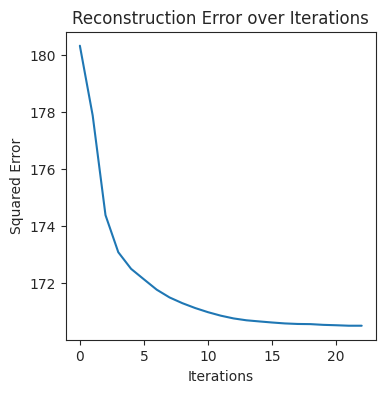

In [48]:
# Check for convergence 
model.plot_convergence()

In [49]:
ipf.write('../data/analysis/hlca_healthy_ipf_embed_balanced/ipf_random_subset10k_seacells.h5ad')

/tmp/ipykernel_1364634/2761727437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)


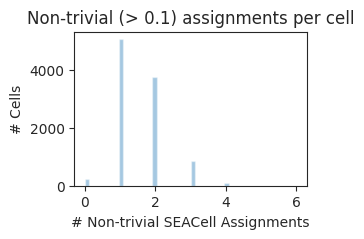

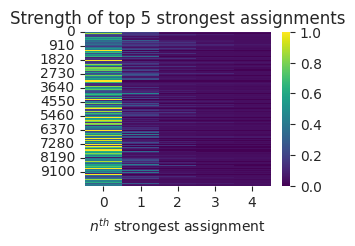

In [50]:
plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

In [51]:
labels,weights = model.get_soft_assignments()

In [52]:
mean_attn_score_per_seacell = ipf.obs[['cell_attn', 'SEACell']].groupby('SEACell').agg('mean')
mean_attn_score_per_seacell

cell_attn
SEACell              
SEACell-0    0.005783
SEACell-1    0.005829
SEACell-2    0.007129
SEACell-3    0.005206
SEACell-4    0.010850
...               ...
SEACell-95   0.004568
SEACell-96   0.005451
SEACell-97   0.006069
SEACell-98   0.004103
SEACell-99   0.008617

[100 rows x 1 columns]

In [53]:
SEACell_ad = SEACells.core.summarize_by_SEACell(ipf, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 100/100 [00:01<00:00, 88.67it/s]


AnnData object with n_obs × n_vars = 100 × 30
    layers: 'raw'

In [54]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


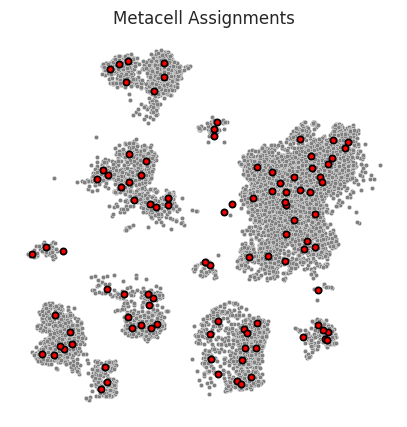

In [55]:
SEACells.plot.plot_2D(ipf, key='X_umap', colour_metacells=False)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


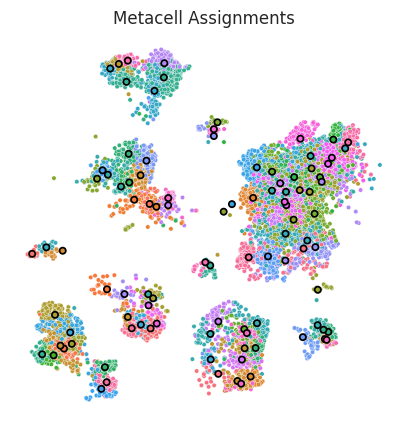

In [56]:
SEACells.plot.plot_2D(ipf, key='X_umap', colour_metacells=True)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/SEACells/SEACells/plot.py:130: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby("SEACell").count().iloc[:, 0], bins=bins)


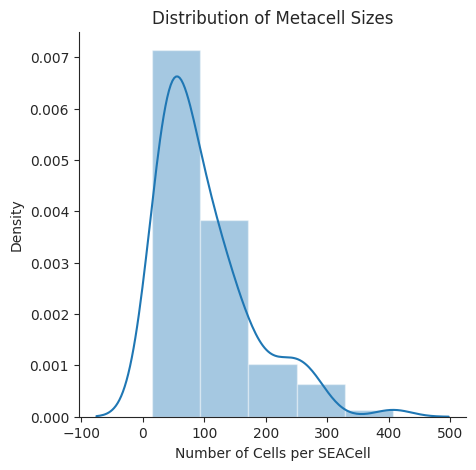

size
SEACell         
SEACell-0     97
SEACell-1     37
SEACell-2     75
SEACell-3     28
SEACell-4     67
...          ...
SEACell-95    84
SEACell-96   159
SEACell-97    69
SEACell-98   122
SEACell-99    71

[100 rows x 1 columns]

In [57]:
SEACells.plot.plot_SEACell_sizes(ipf, bins=5)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


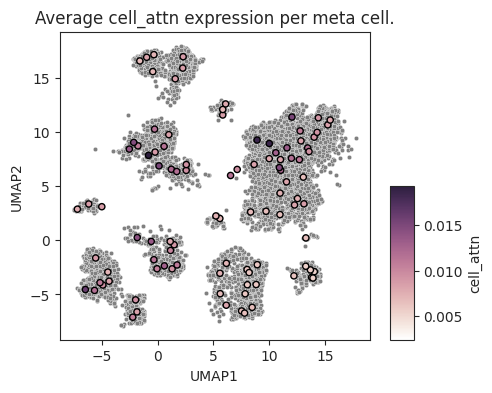

In [58]:
plot_sea_cells(ipf, mean_attn_score_per_seacell,'cell_attn')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


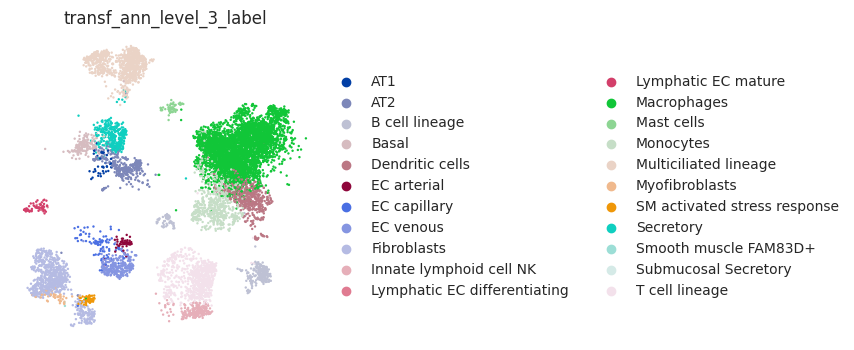

In [59]:
sc.pl.umap(ipf, color=['transf_ann_level_3_label'], ncols=1, frameon=False)

In [60]:
ipf.write('../data/analysis/hlca_healthy_ipf_embed_balanced/ipf_random_subset10k_seacells.h5ad')

# IPF top 10k with highest attn scores

In [19]:
ipf_top

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [20]:
## User defined parameters

## Core parameters 
n_SEACells = 100
build_kernel_on = 'X' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [21]:
model = SEACells.core.SEACells(
    ipf_top, 
    build_kernel_on=build_kernel_on, 
    n_SEACells=n_SEACells, 
    n_waypoint_eigs=n_waypoint_eigs,
    convergence_epsilon = 1e-5
)

Welcome to SEACells!


In [22]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/10000 [00:00<?, ?it/s]

Constructing CSR matrix...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


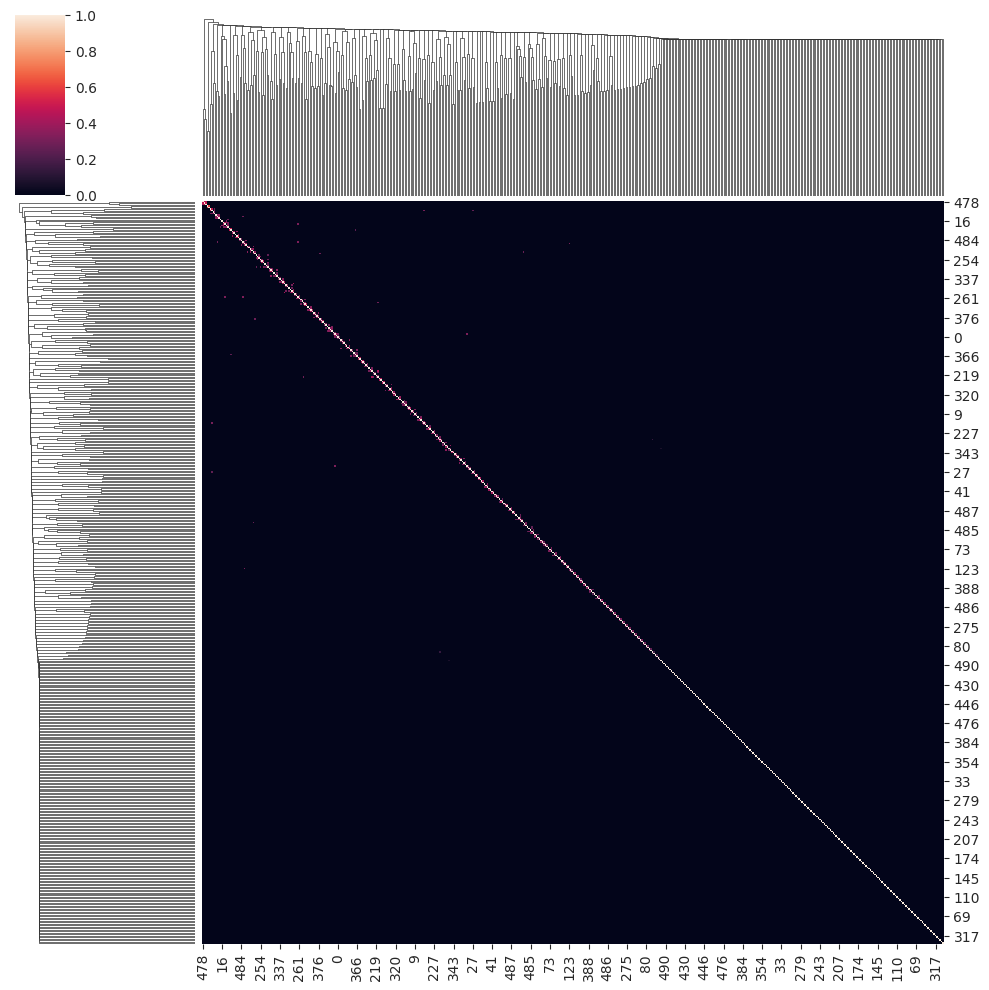

In [23]:
sns.clustermap(M.toarray()[:500,:500])

In [24]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X
Computing diffusion components from X for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 88 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 22/22 [00:00<00:00, 76.67it/s]

Selecting 12 cells from greedy initialization.


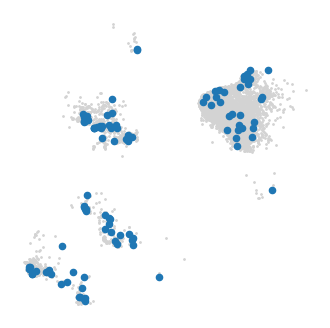

In [25]:
# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ipf_top, model)

In [26]:
%%time

model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.00183
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Converged after 36 iterations.
CPU times: user 10min 36s, sys: 8min 48s, total: 19min 25s
Wall time: 7min 51s


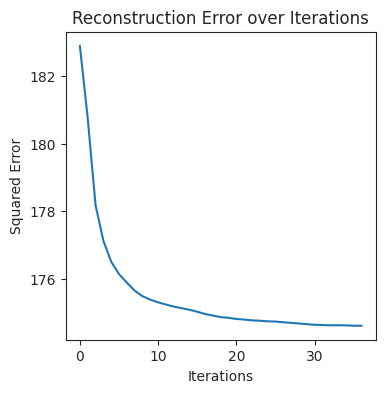

In [27]:
# Check for convergence 
model.plot_convergence()

In [28]:
ipf.write('../data/analysis/hlca_healthy_ipf_embed_balanced/ipf_top10k_seacells.h5ad')

/tmp/ipykernel_510506/2761727437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)


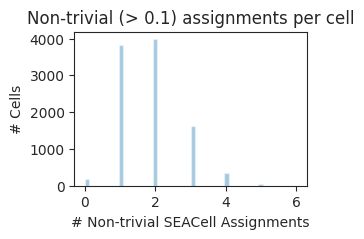

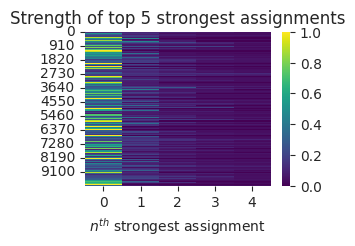

In [29]:
plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

In [30]:
labels,weights = model.get_soft_assignments()

In [31]:
mean_attn_score_per_seacell = ipf_top.obs[['cell_attn', 'SEACell']].groupby('SEACell').agg('mean')
mean_attn_score_per_seacell

cell_attn
SEACell              
SEACell-0    0.021864
SEACell-1    0.021636
SEACell-10   0.021501
SEACell-11   0.022469
SEACell-12   0.023468
...               ...
SEACell-95   0.021334
SEACell-96   0.022508
SEACell-97   0.021408
SEACell-98   0.021692
SEACell-99   0.021184

[100 rows x 1 columns]

In [32]:
SEACell_ad = SEACells.core.summarize_by_SEACell(ipf_top, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 100/100 [00:01<00:00, 59.93it/s]


AnnData object with n_obs × n_vars = 100 × 30
    layers: 'raw'

In [33]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


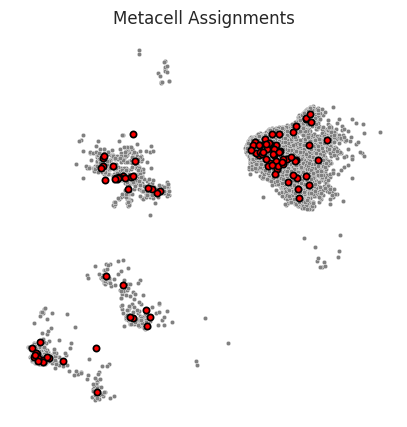

In [34]:
SEACells.plot.plot_2D(ipf_top, key='X_umap', colour_metacells=False)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


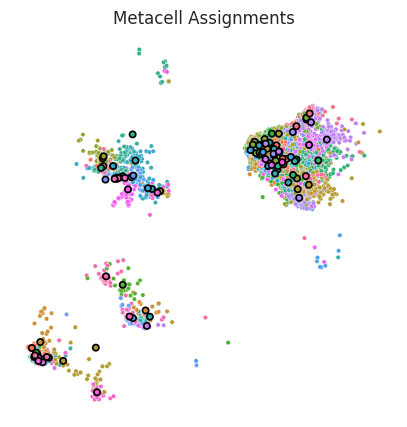

In [35]:
SEACells.plot.plot_2D(ipf_top, key='X_umap', colour_metacells=True)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/SEACells/SEACells/plot.py:130: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby("SEACell").count().iloc[:, 0], bins=bins)


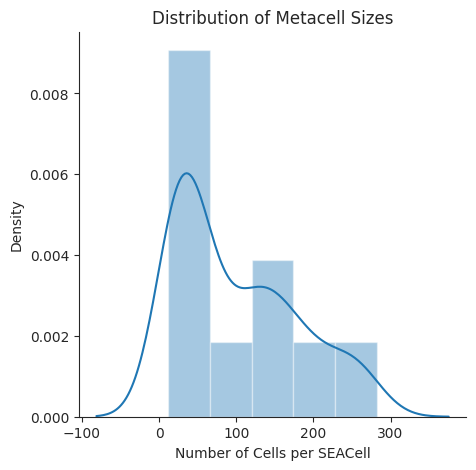

size
SEACell         
SEACell-0     60
SEACell-1     32
SEACell-10   132
SEACell-11   185
SEACell-12    17
...          ...
SEACell-95    39
SEACell-96    42
SEACell-97    33
SEACell-98    91
SEACell-99    63

[100 rows x 1 columns]

In [36]:
SEACells.plot.plot_SEACell_sizes(ipf_top, bins=5)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


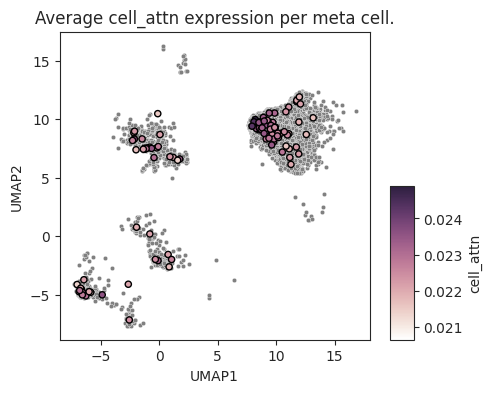

In [37]:
plot_sea_cells(ipf_top, mean_attn_score_per_seacell,'cell_attn')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


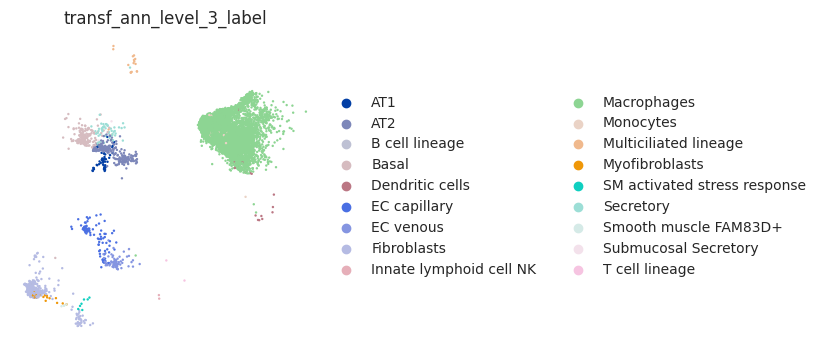

In [38]:
sc.pl.umap(ipf_top, color=['transf_ann_level_3_label'], ncols=1, frameon=False)

In [39]:
ipf_top.write('../data/analysis/hlca_healthy_ipf_embed_balanced/ipf_top10k_seacells.h5ad')

# both healthy and ipf

In [7]:
healthy = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/healthy_random_subset10k_seacells.h5ad')
healthy

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [8]:
ipf = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/ipf_random_subset10k_seacells.h5ad')
ipf

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [9]:
adata = ad.concat([healthy, ipf])
del adata.obs['SEACell']
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [10]:
## User defined parameters

## Core parameters 
n_SEACells = 200
build_kernel_on = 'X' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [11]:
model = SEACells.core.SEACells(
    adata, 
    build_kernel_on=build_kernel_on, 
    n_SEACells=n_SEACells, 
    n_waypoint_eigs=n_waypoint_eigs,
    convergence_epsilon = 1e-5
)

Welcome to SEACells!


In [12]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/20000 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/20000 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/20000 [00:00<?, ?it/s]

Constructing CSR matrix...


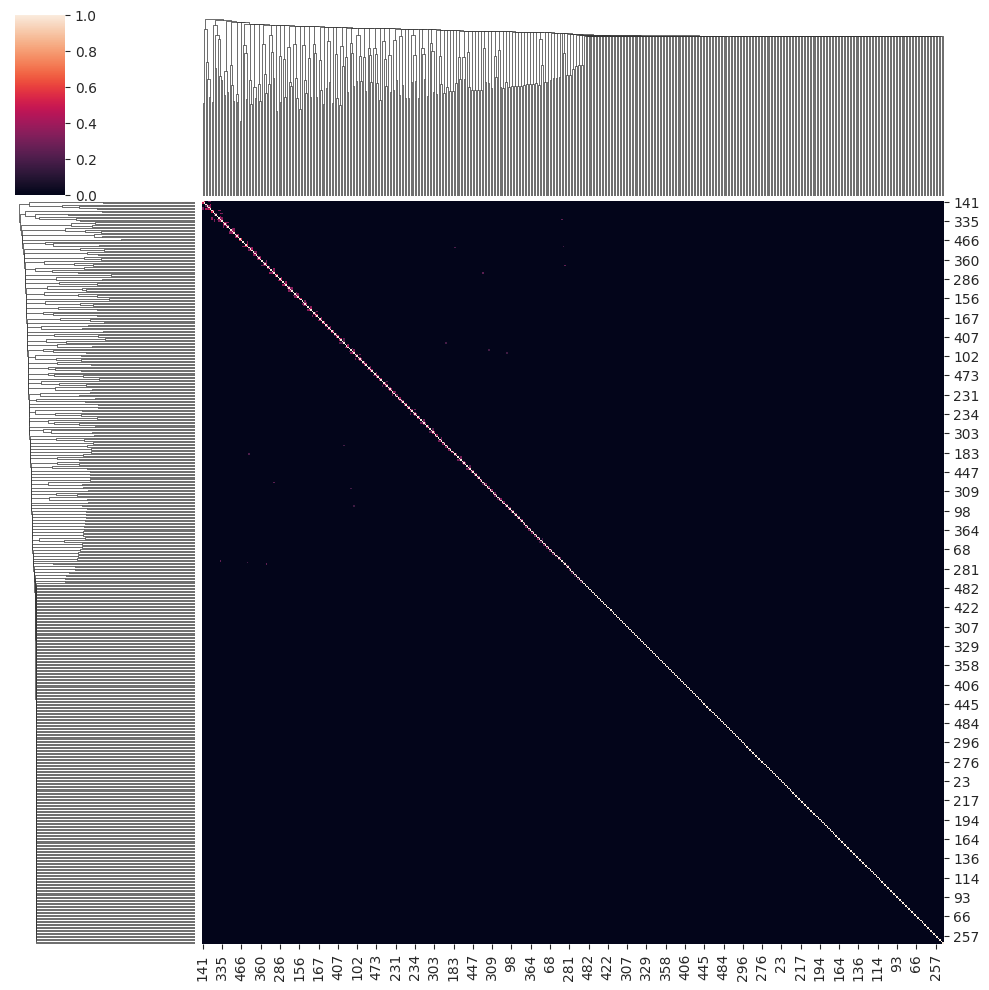

In [13]:
sns.clustermap(M.toarray()[:500,:500])

In [14]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X
Computing diffusion components from X for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 175 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 35/35 [00:01<00:00, 30.69it/s]

Selecting 25 cells from greedy initialization.


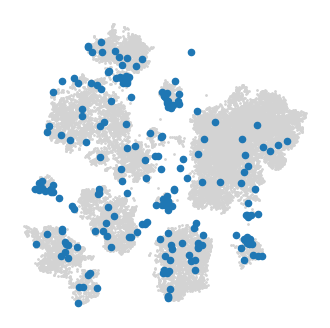

In [15]:
# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(adata, model)

In [16]:
%%time

model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.00255
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 26 iterations.
CPU times: user 40min 39s, sys: 12min 44s, total: 53min 24s
Wall time: 36min 31s


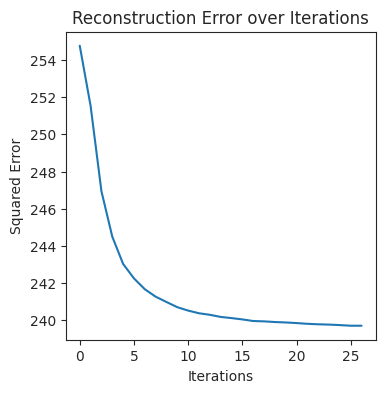

In [17]:
# Check for convergence 
model.plot_convergence()

In [18]:
adata.write('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/healthy_ipf_random20k_200_seacells.h5ad')

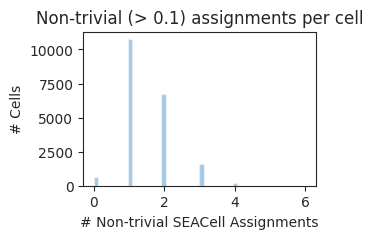

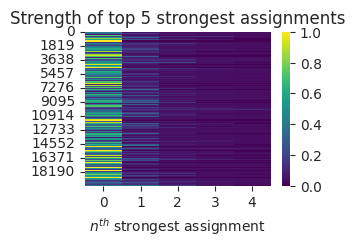

In [19]:
plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

In [22]:
labels,weights = model.get_soft_assignments()

# meta cell UMAPs

## seacells calculated jointly

In [6]:
adata = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/healthy_ipf_random20k_seacells.h5ad')
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [194]:
percentage_healthy_per_seacell = adata.obs[['lung_condition_coarse', 'SEACell']].groupby('SEACell')['lung_condition_coarse'].agg(lambda s: s.value_counts().values[0] / (s.value_counts().values[0] + s.value_counts().values[1]))
percentage_healthy_per_seacell.name = 'percentage IPF'
percentage_healthy_per_seacell

SEACell
SEACell-0     0.805970
SEACell-1     0.750000
SEACell-2     0.693878
SEACell-3     0.931429
SEACell-4     0.836364
                ...   
SEACell-95    0.697987
SEACell-96    0.718310
SEACell-97    0.850000
SEACell-98    0.674286
SEACell-99    0.680000
Name: percentage IPF, Length: 100, dtype: float64

In [195]:
majority_celltype_per_seacell = adata.obs[['transf_ann_level_3_label', 'SEACell']].groupby('SEACell')['transf_ann_level_3_label'].agg(lambda s: s.value_counts().index[0])
majority_celltype_per_seacell

SEACell
SEACell-0                 Fibroblasts
SEACell-1                 EC arterial
SEACell-2                 Fibroblasts
SEACell-3                 Fibroblasts
SEACell-4     Innate lymphoid cell NK
                       ...           
SEACell-95                        AT2
SEACell-96             B cell lineage
SEACell-97                 Mast cells
SEACell-98                Macrophages
SEACell-99             T cell lineage
Name: transf_ann_level_3_label, Length: 100, dtype: object

In [196]:
majority_class_per_seacell = adata.obs[['lung_condition_coarse', 'SEACell']].groupby('SEACell')['lung_condition_coarse'].agg(lambda s: s.value_counts().index[0])
majority_class_per_seacell

SEACell
SEACell-0         IPF
SEACell-1     Healthy
SEACell-2     Healthy
SEACell-3         IPF
SEACell-4         IPF
               ...   
SEACell-95        IPF
SEACell-96        IPF
SEACell-97    Healthy
SEACell-98    Healthy
SEACell-99    Healthy
Name: lung_condition_coarse, Length: 100, dtype: object

In [197]:
mean_attn_score_per_seacell = adata.obs[['cell_attn', 'SEACell']].groupby('SEACell').agg('mean')
mean_attn_score_per_seacell

cell_attn
SEACell              
SEACell-0    0.004592
SEACell-1    0.007854
SEACell-2    0.004200
SEACell-3    0.012007
SEACell-4    0.004156
...               ...
SEACell-95   0.007146
SEACell-96   0.002905
SEACell-97   0.005679
SEACell-98   0.009174
SEACell-99   0.006794

[100 rows x 1 columns]

In [198]:
SEACell_ad = SEACells.core.summarize_by_SEACell(adata, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 100/100 [00:01<00:00, 56.72it/s]


AnnData object with n_obs × n_vars = 100 × 30
    layers: 'raw'

In [199]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell)
SEACell_ad.obs = SEACell_ad.obs.join(majority_class_per_seacell)
SEACell_ad.obs = SEACell_ad.obs.join(majority_celltype_per_seacell)
SEACell_ad.obs = SEACell_ad.obs.join(percentage_healthy_per_seacell)
SEACell_ad

AnnData object with n_obs × n_vars = 100 × 30
    obs: 'cell_attn', 'lung_condition_coarse', 'transf_ann_level_3_label', 'percentage IPF'
    layers: 'raw'

In [200]:
sc.pp.neighbors(SEACell_ad)

In [201]:
sc.pp.pca(SEACell_ad)

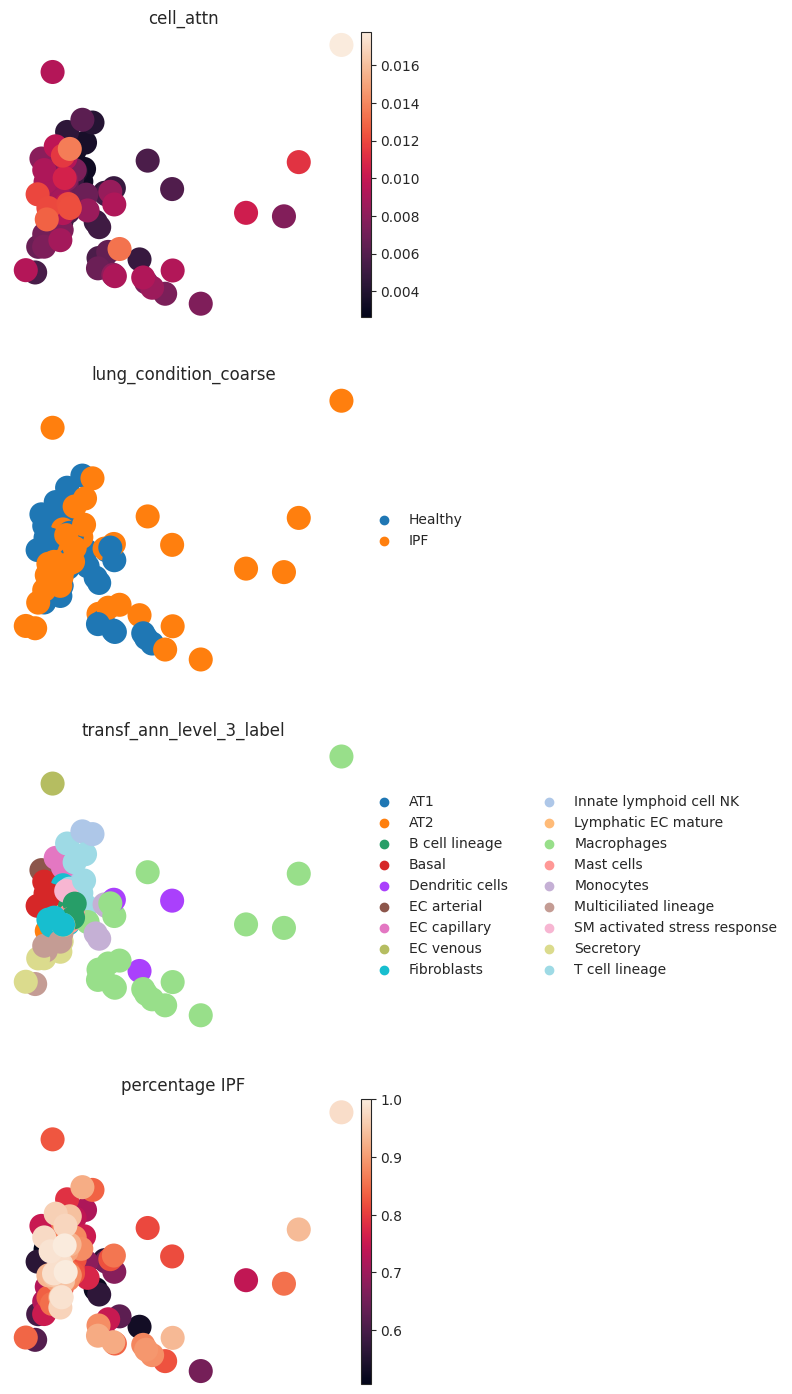

In [202]:
sc.pl.pca(SEACell_ad, color=SEACell_ad.obs.columns, frameon=False, ncols=1)

In [203]:
sc.tl.umap(SEACell_ad)

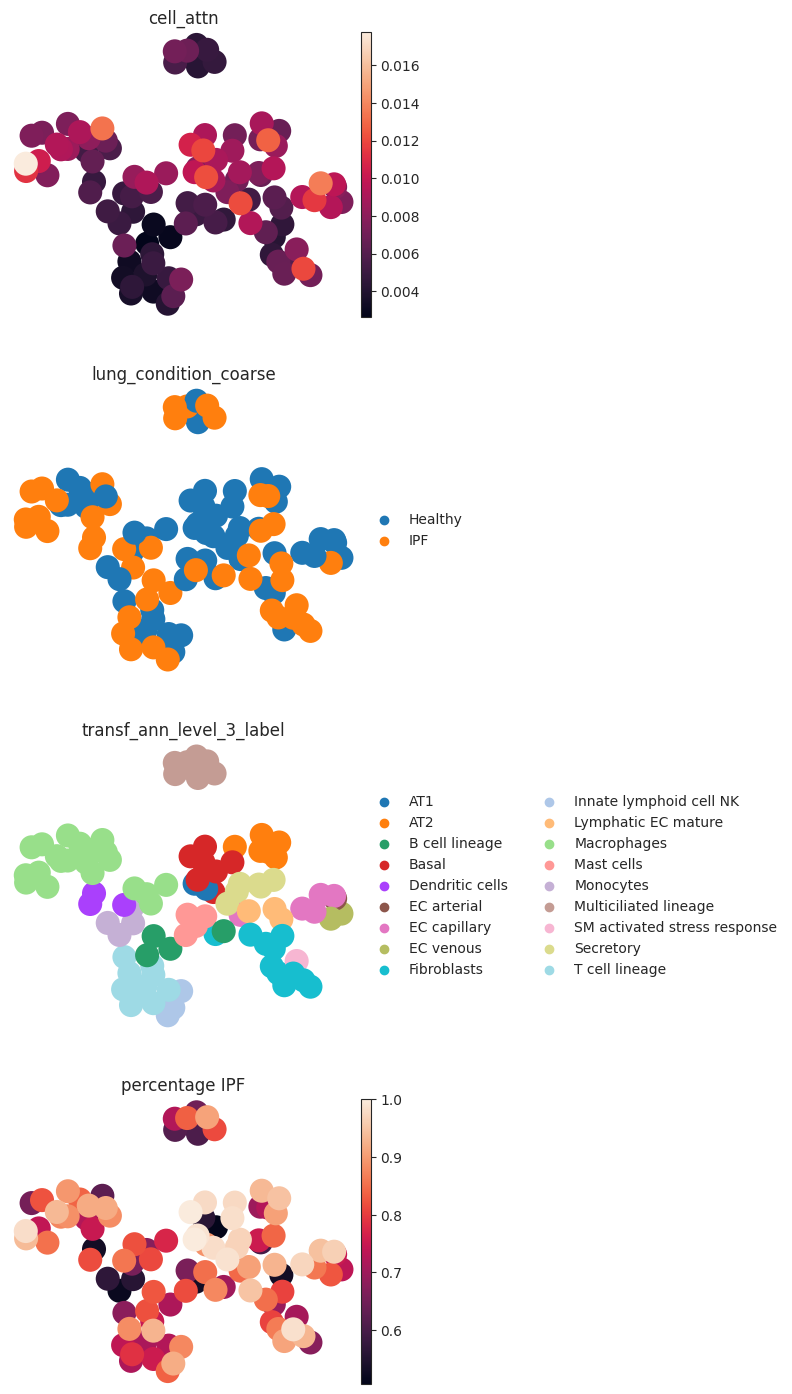

In [204]:
sc.pl.umap(SEACell_ad, color=SEACell_ad.obs.columns, frameon=False, ncols=1)

In [205]:
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [206]:
adata.X = adata.X * np.array(adata.obs['cell_attn']).reshape(-1, 1)

In [214]:
SEACell_ad = SEACells.core.summarize_by_SEACell(adata, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 100/100 [00:01<00:00, 74.69it/s]


AnnData object with n_obs × n_vars = 100 × 30
    layers: 'raw'

In [215]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell).join(majority_class_per_seacell).join(majority_celltype_per_seacell).join(percentage_healthy_per_seacell)
SEACell_ad

AnnData object with n_obs × n_vars = 100 × 30
    obs: 'cell_attn', 'lung_condition_coarse', 'transf_ann_level_3_label', 'percentage IPF'
    layers: 'raw'

In [216]:
sc.pp.neighbors(SEACell_ad)

In [217]:
sc.pp.pca(SEACell_ad)

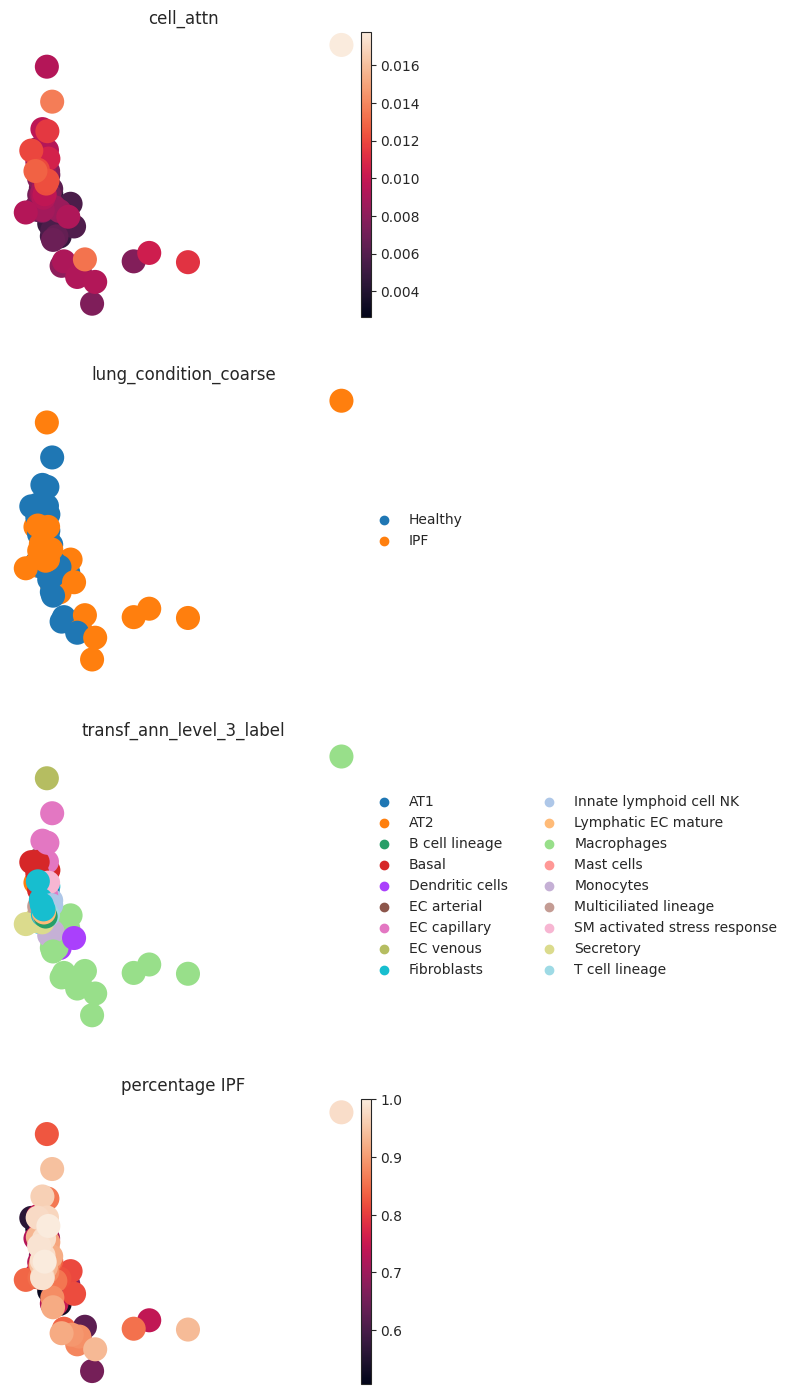

In [218]:
sc.pl.pca(SEACell_ad, color=SEACell_ad.obs.columns, frameon=False, ncols=1)

In [219]:
sc.tl.umap(SEACell_ad)

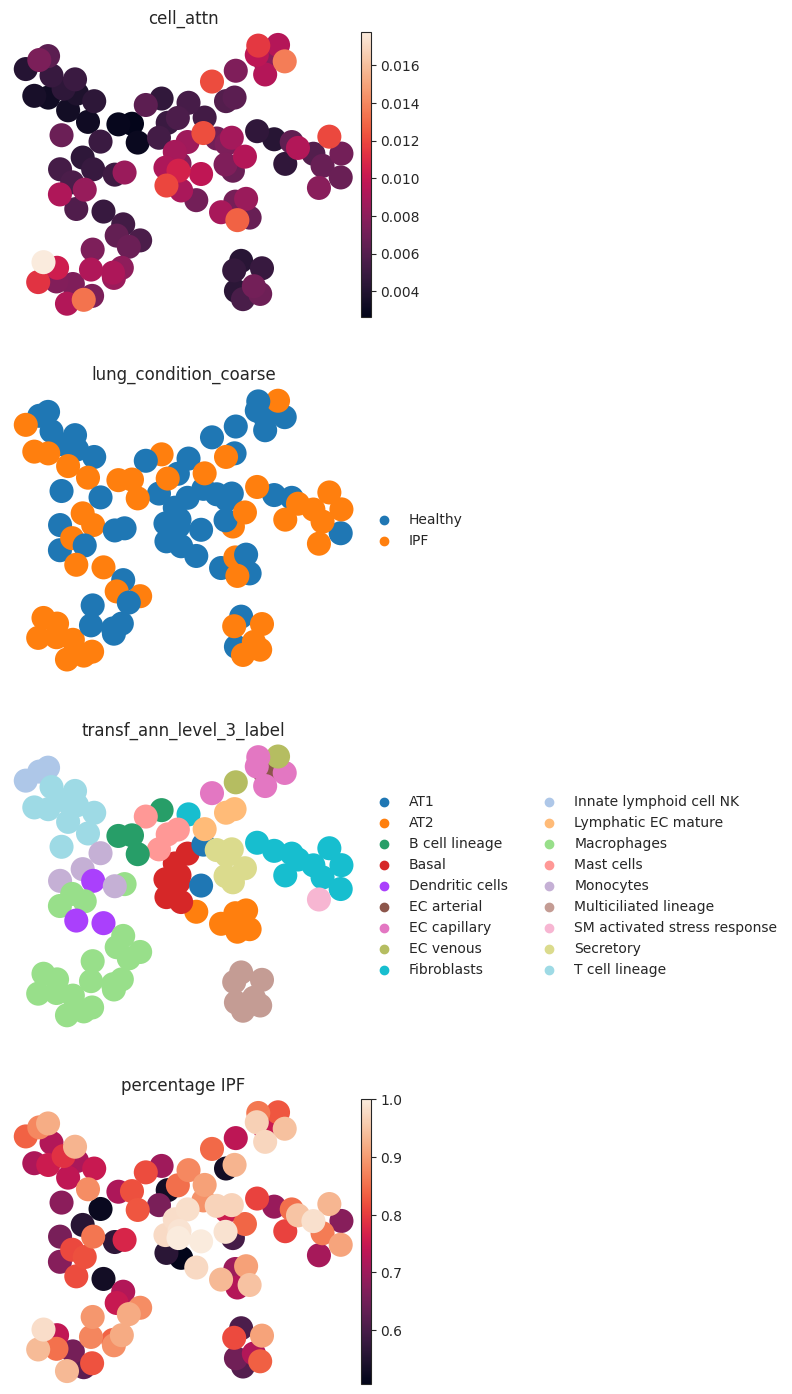

In [220]:
sc.pl.umap(SEACell_ad, color=SEACell_ad.obs.columns, frameon=False, ncols=1)

## seacells calculated separately

In [150]:
healthy = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/healthy_random_subset10k_seacells.h5ad')
healthy

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [151]:
healthy.obs['SEACell'] = healthy.obs['SEACell'].astype(str) + '-healthy'
healthy.obs['SEACell'] = healthy.obs['SEACell'].astype('category')

In [152]:
ipf = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/ipf_random_subset10k_seacells.h5ad')
ipf

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [153]:
ipf.obs['SEACell'] = ipf.obs['SEACell'].astype(str) + '-ipf'
ipf.obs['SEACell'] = ipf.obs['SEACell'].astype('category')

In [154]:
adata = ad.concat([healthy, ipf])
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [155]:
majority_celltype_per_seacell = adata.obs[['transf_ann_level_3_label', 'SEACell']].groupby('SEACell')['transf_ann_level_3_label'].agg(lambda s: s.value_counts().index[0])
majority_celltype_per_seacell

SEACell
SEACell-0-healthy              T cell lineage
SEACell-0-ipf                 Dendritic cells
SEACell-1-healthy                 Fibroblasts
SEACell-1-ipf         Innate lymphoid cell NK
SEACell-2-healthy                 Fibroblasts
                               ...           
SEACell-97-ipf                    Fibroblasts
SEACell-98-healthy               EC capillary
SEACell-98-ipf                      Monocytes
SEACell-99-healthy                  Secretory
SEACell-99-ipf                      EC venous
Name: transf_ann_level_3_label, Length: 200, dtype: object

In [156]:
majority_class_per_seacell = adata.obs[['lung_condition_coarse', 'SEACell']].groupby('SEACell')['lung_condition_coarse'].agg(lambda s: s.value_counts().index[0])
majority_class_per_seacell

SEACell
SEACell-0-healthy     Healthy
SEACell-0-ipf             IPF
SEACell-1-healthy     Healthy
SEACell-1-ipf             IPF
SEACell-2-healthy     Healthy
                       ...   
SEACell-97-ipf            IPF
SEACell-98-healthy    Healthy
SEACell-98-ipf            IPF
SEACell-99-healthy    Healthy
SEACell-99-ipf            IPF
Name: lung_condition_coarse, Length: 200, dtype: object

In [157]:
mean_attn_score_per_seacell = adata.obs[['cell_attn', 'SEACell']].groupby('SEACell').agg('mean')
mean_attn_score_per_seacell

cell_attn
SEACell                      
SEACell-0-healthy    0.004393
SEACell-0-ipf        0.005783
SEACell-1-healthy    0.006094
SEACell-1-ipf        0.005829
SEACell-2-healthy    0.008268
...                       ...
SEACell-97-ipf       0.006069
SEACell-98-healthy   0.009615
SEACell-98-ipf       0.004103
SEACell-99-healthy   0.006550
SEACell-99-ipf       0.008617

[200 rows x 1 columns]

In [159]:
SEACell_ad = SEACells.core.summarize_by_SEACell(adata, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 200/200 [00:03<00:00, 65.18it/s]


AnnData object with n_obs × n_vars = 200 × 30
    layers: 'raw'

In [165]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell).join(majority_class_per_seacell).join(majority_celltype_per_seacell)
SEACell_ad

AnnData object with n_obs × n_vars = 200 × 30
    obs: 'cell_attn', 'lung_condition_coarse', 'transf_ann_level_3_label'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

In [166]:
sc.pp.neighbors(SEACell_ad)

In [167]:
sc.pp.pca(SEACell_ad)

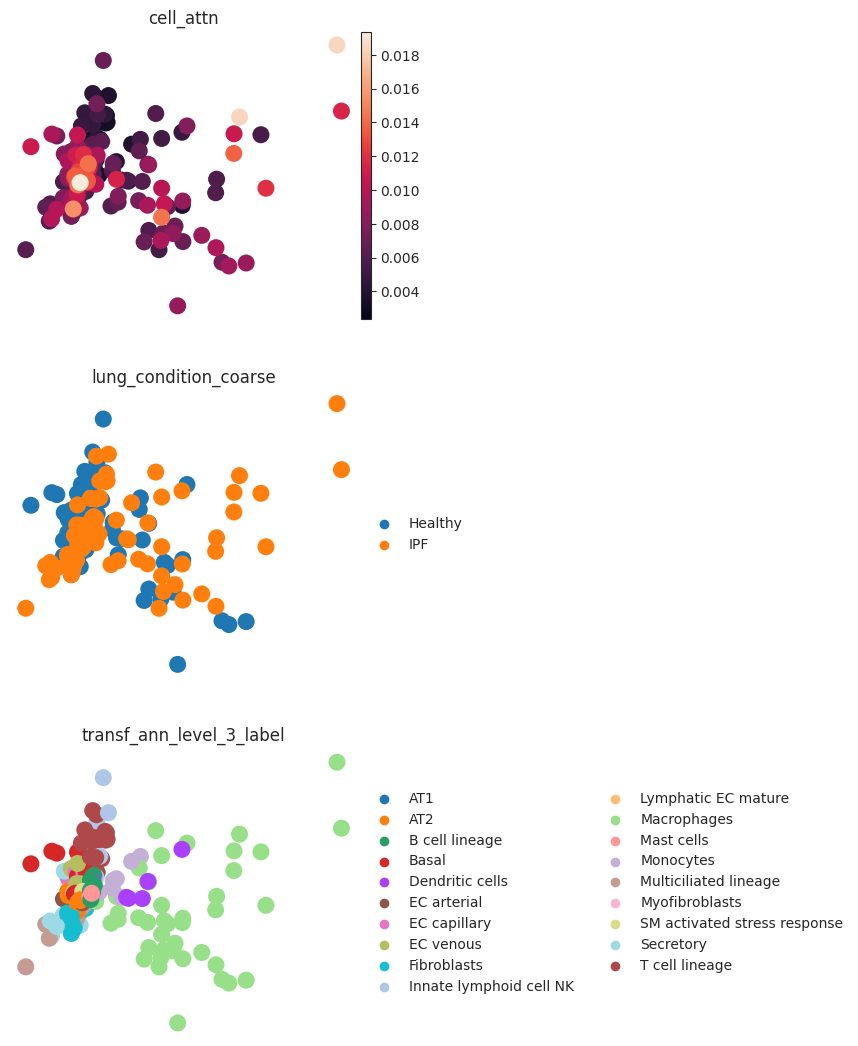

In [168]:
sc.pl.pca(SEACell_ad, color=SEACell_ad.obs.columns, frameon=False, ncols=1)

In [169]:
sc.tl.umap(SEACell_ad)

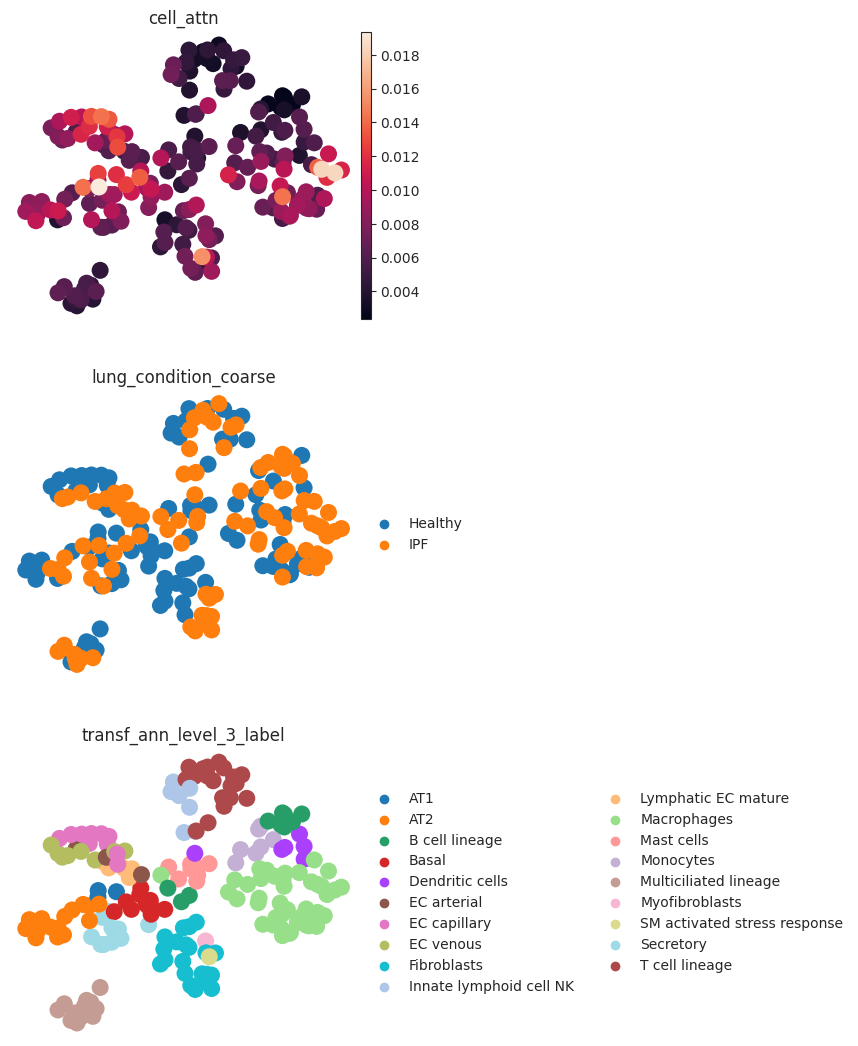

In [170]:
sc.pl.umap(SEACell_ad, color=SEACell_ad.obs.columns, frameon=False, ncols=1)

In [171]:
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [172]:
adata.X = adata.X * np.array(adata.obs['cell_attn']).reshape(-1, 1)

In [173]:
SEACell_ad = SEACells.core.summarize_by_SEACell(adata, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 200/200 [00:02<00:00, 75.86it/s]


AnnData object with n_obs × n_vars = 200 × 30
    layers: 'raw'

In [174]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell).join(majority_class_per_seacell).join(majority_celltype_per_seacell)
SEACell_ad

AnnData object with n_obs × n_vars = 200 × 30
    obs: 'cell_attn', 'lung_condition_coarse', 'transf_ann_level_3_label'
    layers: 'raw'

In [175]:
sc.pp.neighbors(SEACell_ad)

In [176]:
sc.pp.pca(SEACell_ad)

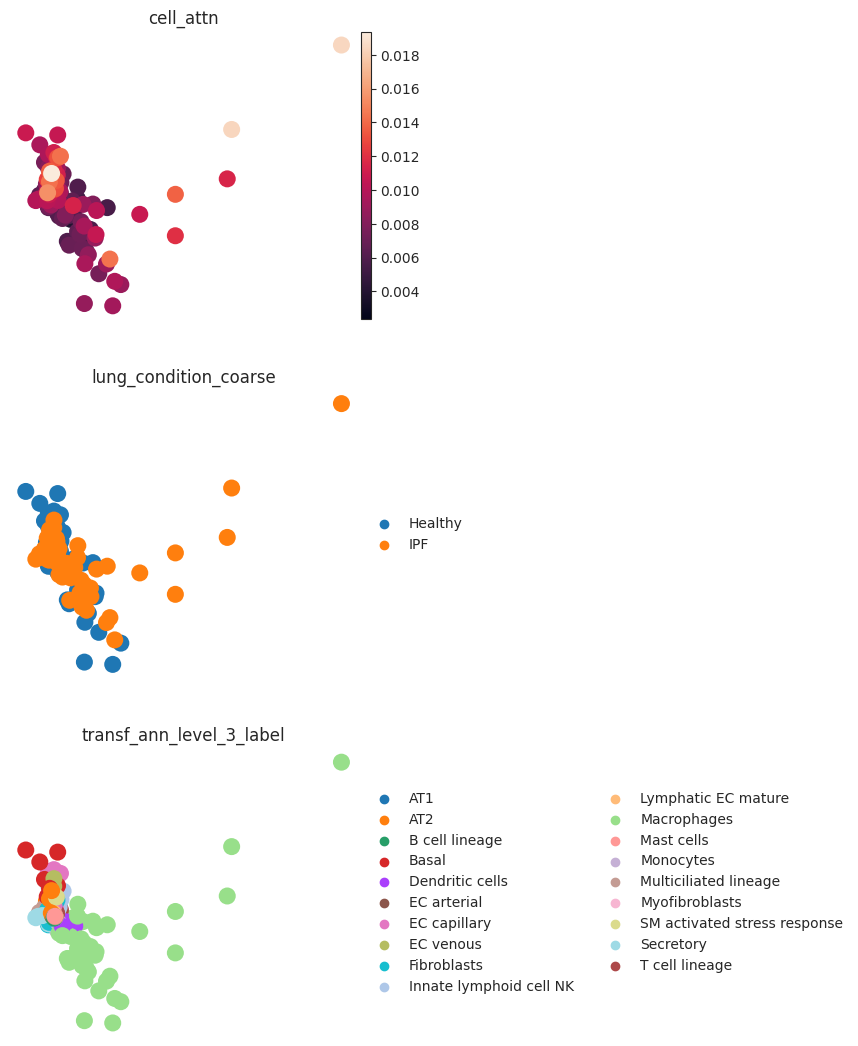

In [177]:
sc.pl.pca(SEACell_ad, color=SEACell_ad.obs.columns, frameon=False, ncols=1)

In [178]:
sc.tl.umap(SEACell_ad)

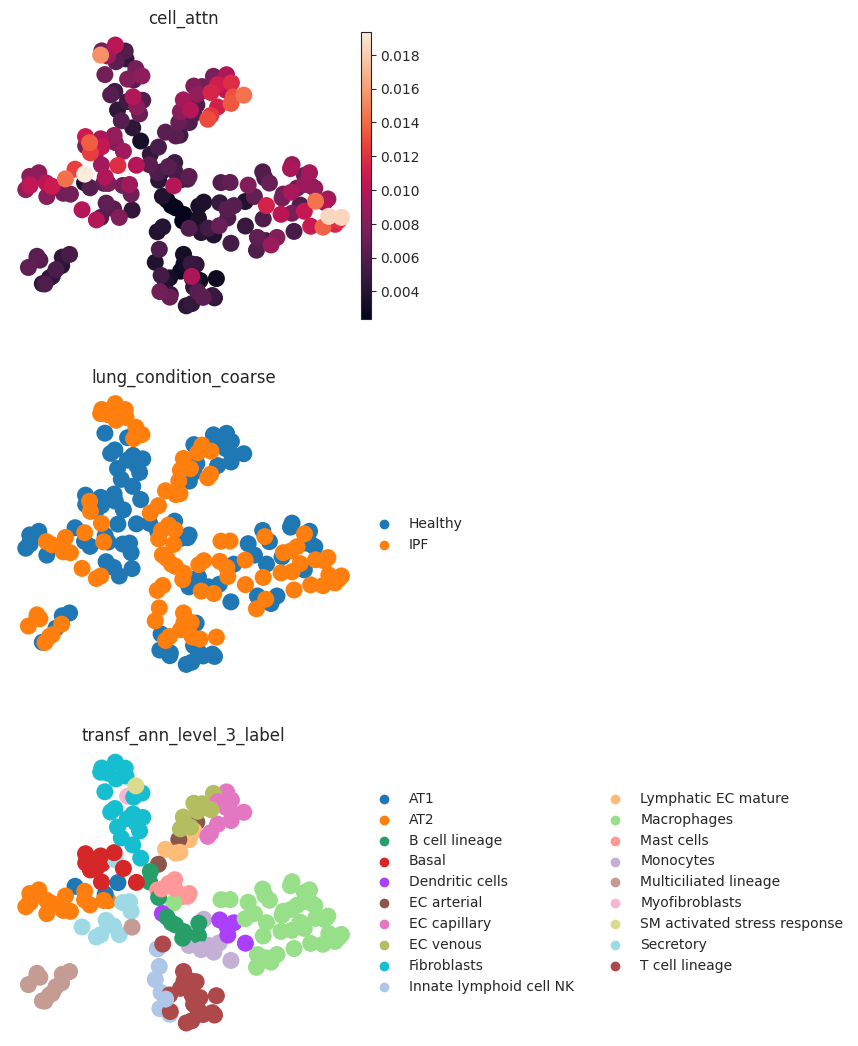

In [179]:
sc.pl.umap(SEACell_ad, color=SEACell_ad.obs.columns, frameon=False, ncols=1)

# latent space plots

In [7]:
healthy = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/healthy_random_subset10k_seacells.h5ad')
healthy

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [8]:
healthy.obs['SEACell'] = healthy.obs['SEACell'].astype(str) + '-healthy'
healthy.obs['SEACell'] = healthy.obs['SEACell'].astype('category')

In [9]:
ipf = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/ipf_random_subset10k_seacells.h5ad')
ipf

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [10]:
ipf.obs['SEACell'] = ipf.obs['SEACell'].astype(str) + '-ipf'
ipf.obs['SEACell'] = ipf.obs['SEACell'].astype('category')

In [11]:
adata = ad.concat([healthy, ipf])
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


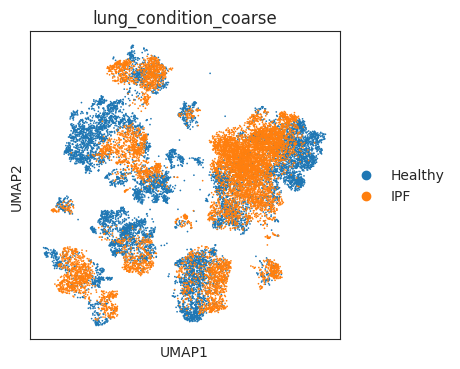

In [63]:
sc.pl.umap(adata, color='lung_condition_coarse')

In [64]:
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [65]:
adata.uns['lung_condition_coarse_colors']

['#1f77b4', '#ff7f0e']

In [17]:
def plot_sea_cells_with_sizes(
    ad,
    condition_key,
    df,
    size_key,
    key="X_umap",
    title="Metacell Assignments",
    save_as=None,
    show=True,
    cmap="Set2",
    figsize=(5, 5),
    # SEACell_size=20,
    cell_size=10,
    plot_all_cells=True,
):
    assert condition_key in df.columns
    assert size_key in df.columns
    assert condition_key in ad.obs.columns
    assert key in ad.obsm.keys()
    assert "SEACell" in ad.obs.columns
    
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    fig, ax = plt.subplots()
    if plot_all_cells is True:
        sns.scatterplot(
            x=0, y=1, color="gray", data=umap, s=cell_size, cmap=cmap, legend=None
        )
    for i, cond in enumerate(np.unique(ad.obs[condition_key])):
        ad_cond = ad[ad.obs[condition_key] == cond].copy()
        umap = pd.DataFrame(ad_cond.obsm[key]).set_index(ad_cond.obs_names).join(ad_cond.obs["SEACell"])
        umap["SEACell"] = umap["SEACell"].astype("category")
        
        mcs = umap.groupby("SEACell").mean()
        mcs = mcs.join(df)
        mcs = mcs.reset_index()
    
        g = sns.scatterplot(
            x=0,
            y=1,
            # s=SEACell_size,
            #hue=ad.uns[f'{condition_key}_colors'][i],
            color=ad.uns[f'{condition_key}_colors'][i],
            data=mcs,
            #cmap=cmap,
            edgecolor="black",
            linewidth=1,
            legend=None,
            size=f"{size_key}"
        )
    #g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(f'Total cell attention per meta cell per condition.')
    
    # norm = plt.Normalize(mcs[f'{color_key}'].min(), mcs[f'{color_key}'].max())
    # cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    
    # cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
    # ax.figure.colorbar(sm, cax=cax, label=f"{color_key}")
    plt.show()

In [71]:
sum_attn_score_per_seacell = adata.obs[['cell_attn', 'SEACell', 'lung_condition_coarse']].groupby('SEACell').agg({'cell_attn': 'mean', 'lung_condition_coarse': 'first'})
sum_attn_score_per_seacell

cell_attn lung_condition_coarse
SEACell                                            
SEACell-0-healthy    0.004393               Healthy
SEACell-0-ipf        0.005783                   IPF
SEACell-1-healthy    0.006094               Healthy
SEACell-1-ipf        0.005829                   IPF
SEACell-2-healthy    0.008268               Healthy
...                       ...                   ...
SEACell-97-ipf       0.006069                   IPF
SEACell-98-healthy   0.009615               Healthy
SEACell-98-ipf       0.004103                   IPF
SEACell-99-healthy   0.006550               Healthy
SEACell-99-ipf       0.008617                   IPF

[200 rows x 2 columns]

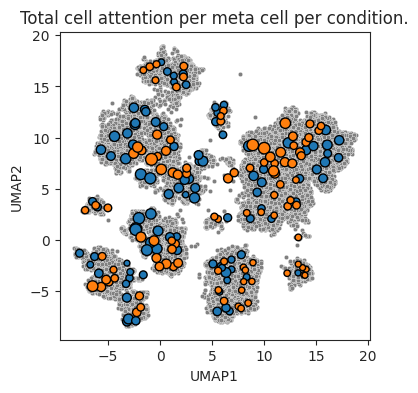

In [91]:
plot_sea_cells_with_sizes(adata, 'lung_condition_coarse', sum_attn_score_per_seacell, 'cell_attn')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


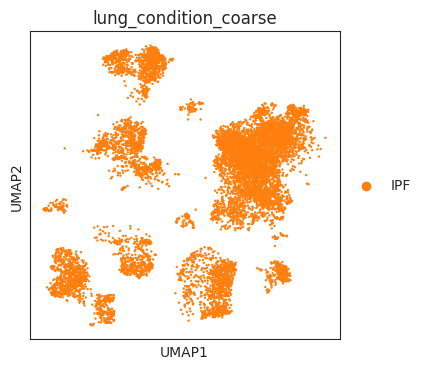

In [77]:
sc.pl.umap(ipf, color='lung_condition_coarse', palette=['#ff7f0e'])

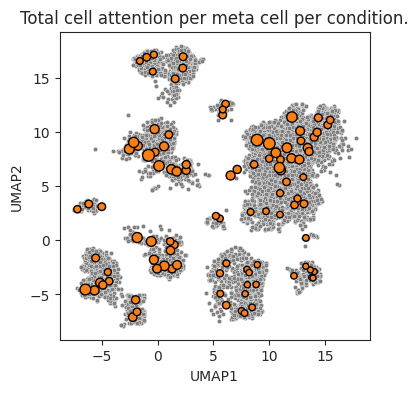

In [92]:
plot_sea_cells_with_sizes(ipf, 'lung_condition_coarse', sum_attn_score_per_seacell, 'cell_attn')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


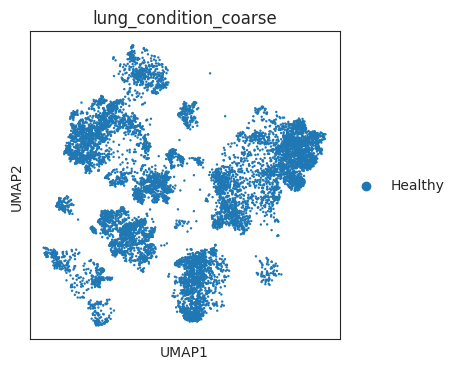

In [79]:
sc.pl.umap(healthy, color='lung_condition_coarse', palette=['#1f77b4'])

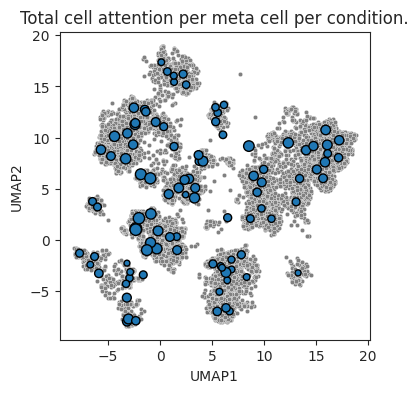

In [93]:
plot_sea_cells_with_sizes(healthy, 'lung_condition_coarse', sum_attn_score_per_seacell, 'cell_attn')

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

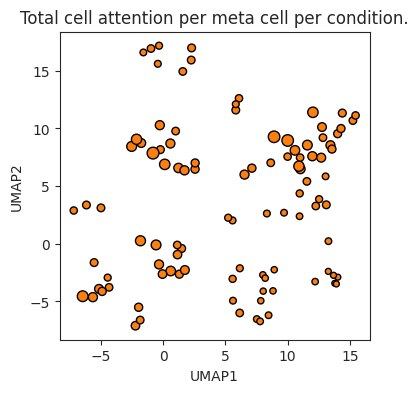

In [83]:
plot_sea_cells_with_sizes(ipf, 'lung_condition_coarse', sum_attn_score_per_seacell, 'cell_attn', plot_all_cells=False)

In [6]:
adata = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/healthy_ipf_random20k_seacells.h5ad')
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [9]:
argmax_celltype = adata.obs[['transf_ann_level_3_label', 'SEACell']].groupby('SEACell')['transf_ann_level_3_label'].agg(pd.Series.mode)
argmax_celltype.name = 'most_common_celltype'
argmax_celltype

SEACell
SEACell-0                 Fibroblasts
SEACell-1                 EC arterial
SEACell-2                 Fibroblasts
SEACell-3                 Fibroblasts
SEACell-4     Innate lymphoid cell NK
                       ...           
SEACell-95                        AT2
SEACell-96             B cell lineage
SEACell-97                 Mast cells
SEACell-98                Macrophages
SEACell-99             T cell lineage
Name: most_common_celltype, Length: 100, dtype: object

In [51]:
percentage_ipf_per_seacell = adata.obs[['lung_condition_coarse', 'SEACell']].groupby('SEACell')['lung_condition_coarse'].agg(lambda s: s.value_counts().values[1] / (s.value_counts().values[0] + s.value_counts().values[1]))
percentage_ipf_per_seacell.name = 'ipf_percentage'
percentage_ipf_per_seacell

SEACell
SEACell-0     0.194030
SEACell-1     0.250000
SEACell-2     0.306122
SEACell-3     0.068571
SEACell-4     0.163636
                ...   
SEACell-95    0.302013
SEACell-96    0.281690
SEACell-97    0.150000
SEACell-98    0.325714
SEACell-99    0.320000
Name: ipf_percentage, Length: 100, dtype: float64

In [11]:
sum_attn_score_per_seacell = adata.obs[['cell_attn', 'SEACell', 'lung_condition_coarse']].groupby('SEACell').agg({'cell_attn': 'mean', 'lung_condition_coarse': 'first'})
sum_attn_score_per_seacell

cell_attn lung_condition_coarse
SEACell                                    
SEACell-0    0.004592               Healthy
SEACell-1    0.007854               Healthy
SEACell-2    0.004200               Healthy
SEACell-3    0.012007               Healthy
SEACell-4    0.004156               Healthy
...               ...                   ...
SEACell-95   0.007146               Healthy
SEACell-96   0.002905               Healthy
SEACell-97   0.005679               Healthy
SEACell-98   0.009174               Healthy
SEACell-99   0.006794               Healthy

[100 rows x 2 columns]

In [53]:
df = sum_attn_score_per_seacell.join(percentage_ipf_per_seacell)
df['cell_attn_big'] = df['cell_attn']*2
df['ipf_percentage_norm'] = df['ipf_percentage'] * 2 - 1
df

cell_attn lung_condition_coarse  ipf_percentage  cell_attn_big  \
SEACell                                                                      
SEACell-0    0.004592               Healthy        0.194030       0.009185   
SEACell-1    0.007854               Healthy        0.250000       0.015707   
SEACell-2    0.004200               Healthy        0.306122       0.008400   
SEACell-3    0.012007               Healthy        0.068571       0.024014   
SEACell-4    0.004156               Healthy        0.163636       0.008311   
...               ...                   ...             ...            ...   
SEACell-95   0.007146               Healthy        0.302013       0.014293   
SEACell-96   0.002905               Healthy        0.281690       0.005810   
SEACell-97   0.005679               Healthy        0.150000       0.011358   
SEACell-98   0.009174               Healthy        0.325714       0.018349   
SEACell-99   0.006794               Healthy        0.320000       0.013587   

            ipf_percentage_norm  
SEACell                          
SEACell-0             -0.611940  
SEACell-1             -0.500000  
SEACell-2             -0.387755  
SEACell-3             -0.862857  
SEACell-4             -0.672727  
...                         ...  
SEACell-95            -0.395973  
SEACell-96            -0.436620  
SEACell-97            -0.700000  
SEACell-98            -0.348571  
SEACell-99            -0.360000  

[100 rows x 5 columns]

In [54]:
df.columns

Index(['cell_attn', 'lung_condition_coarse', 'ipf_percentage', 'cell_attn_big',
       'ipf_percentage_norm'],
      dtype='object')

In [15]:
def plot_sea_cells_with_proportions(
    ad,
    df,
    color_key,
    size_key,
    key="X_umap",
    title="Metacell Assignments",
    save_as=None,
    show=True,
    cmap="coolwarm",
    figsize=(5, 5),
    # SEACell_size=20,
    cell_size=10,
    plot_all_cells=True,
):
    assert color_key in df.columns
    assert size_key in df.columns
    assert key in ad.obsm.keys()
    assert "SEACell" in ad.obs.columns
    
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    fig, ax = plt.subplots()
    if plot_all_cells is True:
        sns.scatterplot(
            x=0, y=1, color="gray", data=umap, s=cell_size, cmap=cmap, legend=None
        )

    
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    mcs = umap.groupby("SEACell").mean()
    mcs = mcs.join(df)
    mcs = mcs.reset_index()

    g = sns.scatterplot(
        x=0,
        y=1,
        # s=SEACell_size,
        hue=f"{color_key}",
        #color=ad.uns[f'{condition_key}_colors'][i],
        data=mcs,
        palette=cmap,
        edgecolor="black",
        linewidth=1,
        legend='brief',
        size=f"{size_key}",
        sizes=(20, 200),
    )
    g.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), ncol=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    # plt.title(f'Total cell attention per meta cell per condition.')
    
    norm = plt.Normalize(mcs[f'{color_key}'].min(), mcs[f'{color_key}'].max())
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])
    
    cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
    ax.figure.colorbar(sm, cax=cax, label=f"Percentage of IPF cells")
    plt.show()

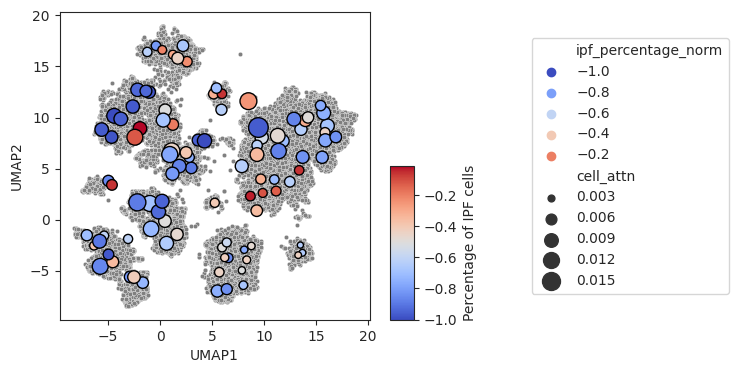

In [49]:
plot_sea_cells_with_proportions(adata, df, 'ipf_percentage_norm', 'cell_attn')

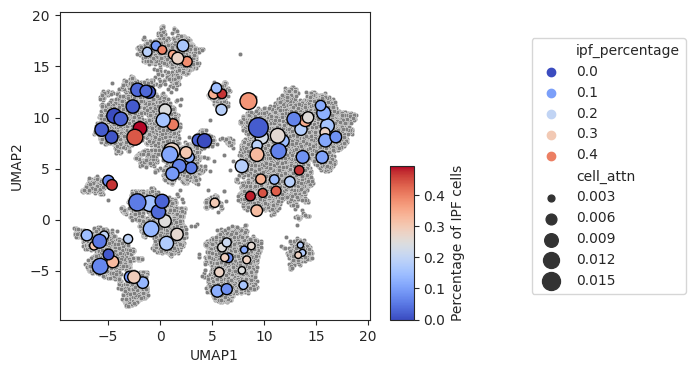

In [55]:
plot_sea_cells_with_proportions(adata, df, 'ipf_percentage', 'cell_attn')

In [13]:
df = sum_attn_score_per_seacell.join(argmax_celltype)
df

cell_attn lung_condition_coarse     most_common_celltype
SEACell                                                             
SEACell-0    0.004592               Healthy              Fibroblasts
SEACell-1    0.007854               Healthy              EC arterial
SEACell-2    0.004200               Healthy              Fibroblasts
SEACell-3    0.012007               Healthy              Fibroblasts
SEACell-4    0.004156               Healthy  Innate lymphoid cell NK
...               ...                   ...                      ...
SEACell-95   0.007146               Healthy                      AT2
SEACell-96   0.002905               Healthy           B cell lineage
SEACell-97   0.005679               Healthy               Mast cells
SEACell-98   0.009174               Healthy              Macrophages
SEACell-99   0.006794               Healthy           T cell lineage

[100 rows x 3 columns]

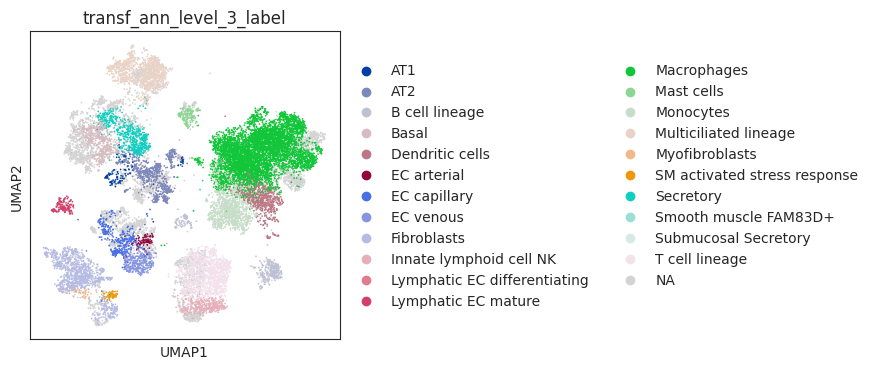

In [22]:
sc.pl.umap(adata, color='transf_ann_level_3_label')

In [24]:
adata.uns['transf_ann_level_3_label_colors']

['#023fa5',
 '#7d87b9',
 '#bec1d4',
 '#d6bcc0',
 '#bb7784',
 '#8e063b',
 '#4a6fe3',
 '#8595e1',
 '#b5bbe3',
 '#e6afb9',
 '#e07b91',
 '#d33f6a',
 '#11c638',
 '#8dd593',
 '#c6dec7',
 '#ead3c6',
 '#f0b98d',
 '#ef9708',
 '#0fcfc0',
 '#9cded6',
 '#d5eae7',
 '#f3e1eb']

In [50]:
def plot_sea_cells_celltypes_with_sizes(
    ad,
    df,
    color_key,
    size_key,
    key="X_umap",
    title="Metacell Assignments",
    save_as=None,
    show=True,
    cmap="coolwarm",
    figsize=(5, 5),
    # SEACell_size=20,
    cell_size=10,
    plot_all_cells=True,
):

    
    assert color_key in df.columns
    assert size_key in df.columns
    assert key in ad.obsm.keys()
    assert "SEACell" in ad.obs.columns
    
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    fig, ax = plt.subplots()
    if plot_all_cells is True:
        sns.scatterplot(
            x=0, y=1, color="gray", data=umap, s=cell_size, cmap=cmap, legend=None
        )

    
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    mcs = umap.groupby("SEACell").mean()
    mcs = mcs.join(df)
    mcs = mcs.reset_index()

    g = sns.scatterplot(
        x=0,
        y=1,
        # s=SEACell_size,
        hue=f"{color_key}",
        #color=adata.uns['transf_ann_level_3_label_colors'],
        data=mcs,
        #palette=cmap,
        edgecolor="black",
        linewidth=1,
        legend='brief',
        size=f"{size_key}",
        sizes=(20, 200),
    )
    g.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), ncol=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    # plt.title(f'Total cell attention per meta cell per condition.')
    
    # norm = plt.Normalize(mcs[f'{color_key}'].min(), mcs[f'{color_key}'].max())
    # cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    # sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    # sm.set_array([])
    
    # cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
    # ax.figure.colorbar(sm, cax=cax, label=f"Percentage of IPF cells")
    plt.show()



In [51]:
df['most_common_celltype'] = df[['most_common_celltype']].astype('str').astype('category')

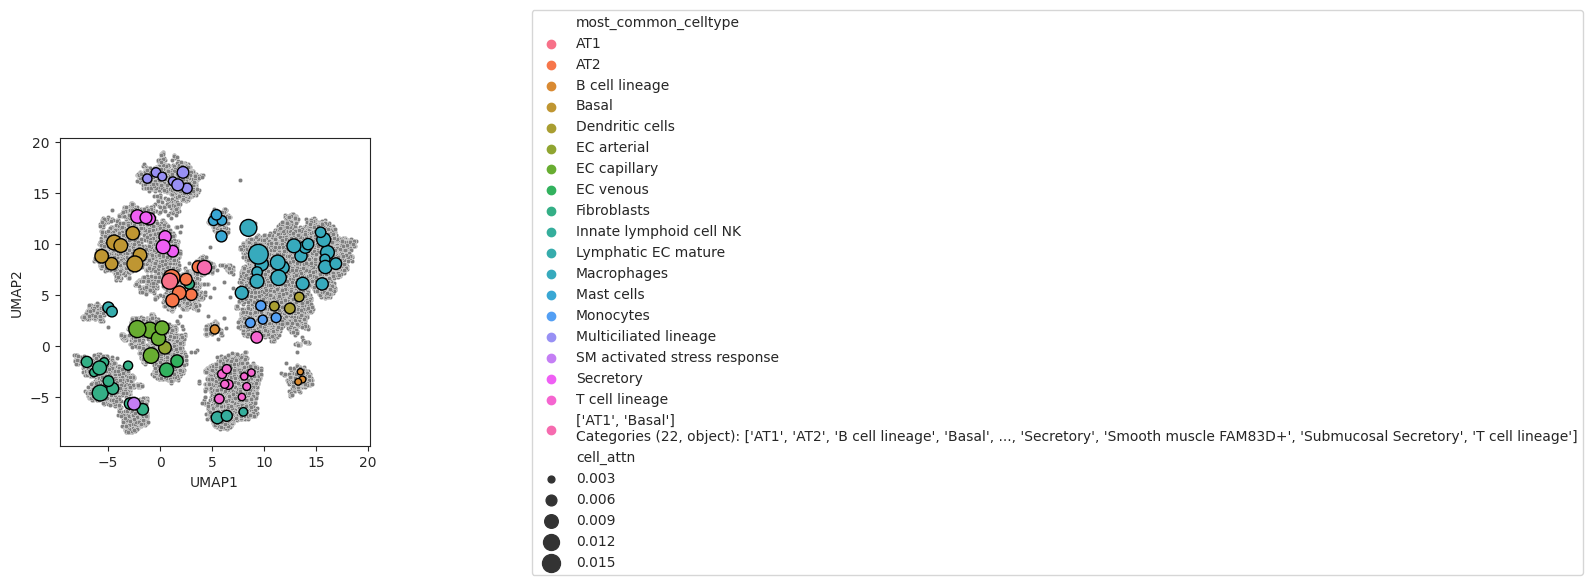

In [52]:
plot_sea_cells_celltypes_with_sizes(adata, df, 'most_common_celltype', 'cell_attn')

## 200 seacells

In [20]:
adata = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/healthy_ipf_random20k_200_seacells.h5ad')
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [21]:
argmax_celltype = adata.obs[['transf_ann_level_3_label', 'SEACell']].groupby('SEACell')['transf_ann_level_3_label'].agg(pd.Series.mode)
argmax_celltype.name = 'most_common_celltype'
argmax_celltype

SEACell
SEACell-0                    Monocytes
SEACell-1               B cell lineage
SEACell-2               T cell lineage
SEACell-3                  Fibroblasts
SEACell-4                    Secretory
                        ...           
SEACell-195      Multiciliated lineage
SEACell-196                        AT2
SEACell-197    Innate lymphoid cell NK
SEACell-198                  Secretory
SEACell-199             T cell lineage
Name: most_common_celltype, Length: 200, dtype: object

In [22]:
percentage_ipf_per_seacell = adata.obs[['lung_condition_coarse', 'SEACell']].groupby('SEACell')['lung_condition_coarse'].agg(lambda s: s.value_counts().values[1] / (s.value_counts().values[0] + s.value_counts().values[1]))
percentage_ipf_per_seacell.name = 'ipf_percentage'
percentage_ipf_per_seacell

SEACell
SEACell-0      0.306569
SEACell-1      0.324324
SEACell-2      0.145455
SEACell-3      0.061404
SEACell-4      0.263158
                 ...   
SEACell-195    0.059406
SEACell-196    0.036585
SEACell-197    0.031250
SEACell-198    0.170455
SEACell-199    0.239583
Name: ipf_percentage, Length: 200, dtype: float64

In [23]:
sum_attn_score_per_seacell = adata.obs[['cell_attn', 'SEACell', 'lung_condition_coarse']].groupby('SEACell').agg({'cell_attn': 'mean', 'lung_condition_coarse': 'first'})
sum_attn_score_per_seacell

cell_attn lung_condition_coarse
SEACell                                     
SEACell-0     0.004068               Healthy
SEACell-1     0.002821               Healthy
SEACell-2     0.004313               Healthy
SEACell-3     0.012823               Healthy
SEACell-4     0.005848               Healthy
...                ...                   ...
SEACell-195   0.004637               Healthy
SEACell-196   0.009312               Healthy
SEACell-197   0.007532               Healthy
SEACell-198   0.008489               Healthy
SEACell-199   0.004818               Healthy

[200 rows x 2 columns]

In [24]:
df = sum_attn_score_per_seacell.join(percentage_ipf_per_seacell)
df['cell_attn_big'] = df['cell_attn']*2
df['ipf_percentage_norm'] = df['ipf_percentage'] * 2 - 1
df

cell_attn lung_condition_coarse  ipf_percentage  cell_attn_big  \
SEACell                                                                       
SEACell-0     0.004068               Healthy        0.306569       0.008136   
SEACell-1     0.002821               Healthy        0.324324       0.005641   
SEACell-2     0.004313               Healthy        0.145455       0.008626   
SEACell-3     0.012823               Healthy        0.061404       0.025646   
SEACell-4     0.005848               Healthy        0.263158       0.011696   
...                ...                   ...             ...            ...   
SEACell-195   0.004637               Healthy        0.059406       0.009274   
SEACell-196   0.009312               Healthy        0.036585       0.018623   
SEACell-197   0.007532               Healthy        0.031250       0.015063   
SEACell-198   0.008489               Healthy        0.170455       0.016978   
SEACell-199   0.004818               Healthy        0.239583       0.009635   

             ipf_percentage_norm  
SEACell                           
SEACell-0              -0.386861  
SEACell-1              -0.351351  
SEACell-2              -0.709091  
SEACell-3              -0.877193  
SEACell-4              -0.473684  
...                          ...  
SEACell-195            -0.881188  
SEACell-196            -0.926829  
SEACell-197            -0.937500  
SEACell-198            -0.659091  
SEACell-199            -0.520833  

[200 rows x 5 columns]

In [25]:
df.columns

Index(['cell_attn', 'lung_condition_coarse', 'ipf_percentage', 'cell_attn_big',
       'ipf_percentage_norm'],
      dtype='object')

In [26]:
def plot_sea_cells_with_proportions(
    ad,
    df,
    color_key,
    size_key,
    key="X_umap",
    title="Metacell Assignments",
    save_as=None,
    show=True,
    cmap="coolwarm",
    figsize=(5, 5),
    # SEACell_size=20,
    cell_size=10,
    plot_all_cells=True,
):
    assert color_key in df.columns
    assert size_key in df.columns
    assert key in ad.obsm.keys()
    assert "SEACell" in ad.obs.columns
    
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    fig, ax = plt.subplots()
    if plot_all_cells is True:
        sns.scatterplot(
            x=0, y=1, color="gray", data=umap, s=cell_size, cmap=cmap, legend=None
        )

    
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    mcs = umap.groupby("SEACell").mean()
    mcs = mcs.join(df)
    mcs = mcs.reset_index()

    g = sns.scatterplot(
        x=0,
        y=1,
        # s=SEACell_size,
        hue=f"{color_key}",
        #color=ad.uns[f'{condition_key}_colors'][i],
        data=mcs,
        palette=cmap,
        edgecolor="black",
        linewidth=1,
        legend='brief',
        size=f"{size_key}",
        sizes=(20, 200),
    )
    g.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), ncol=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    # plt.title(f'Total cell attention per meta cell per condition.')
    
    norm = plt.Normalize(mcs[f'{color_key}'].min(), mcs[f'{color_key}'].max())
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])
    
    cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
    ax.figure.colorbar(sm, cax=cax, label=f"Percentage of IPF cells")
    plt.show()

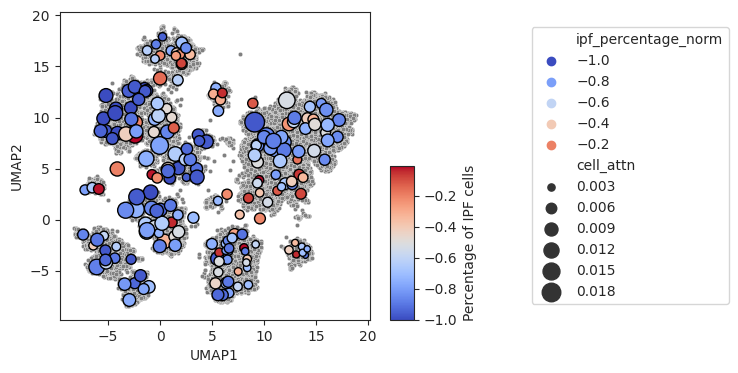

In [27]:
plot_sea_cells_with_proportions(adata, df, 'ipf_percentage_norm', 'cell_attn')

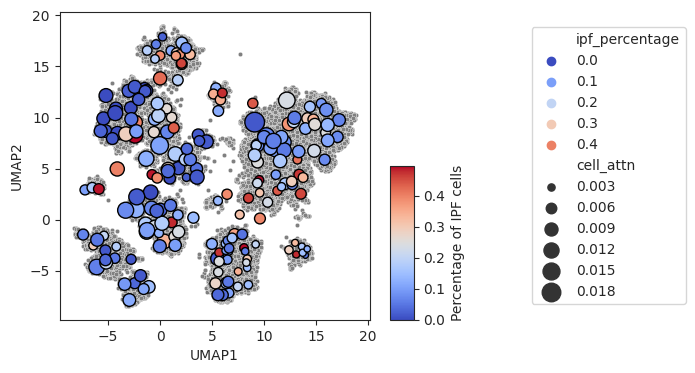

In [28]:
plot_sea_cells_with_proportions(adata, df, 'ipf_percentage', 'cell_attn')

In [29]:
df = sum_attn_score_per_seacell.join(argmax_celltype)
df

cell_attn lung_condition_coarse     most_common_celltype
SEACell                                                              
SEACell-0     0.004068               Healthy                Monocytes
SEACell-1     0.002821               Healthy           B cell lineage
SEACell-2     0.004313               Healthy           T cell lineage
SEACell-3     0.012823               Healthy              Fibroblasts
SEACell-4     0.005848               Healthy                Secretory
...                ...                   ...                      ...
SEACell-195   0.004637               Healthy    Multiciliated lineage
SEACell-196   0.009312               Healthy                      AT2
SEACell-197   0.007532               Healthy  Innate lymphoid cell NK
SEACell-198   0.008489               Healthy                Secretory
SEACell-199   0.004818               Healthy           T cell lineage

[200 rows x 3 columns]

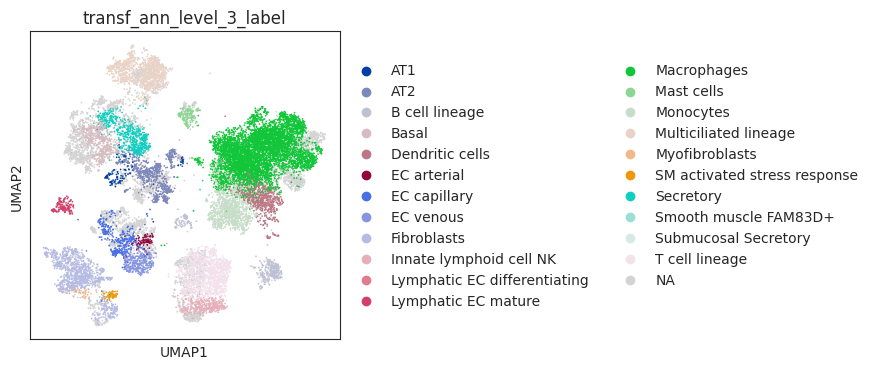

In [30]:
sc.pl.umap(adata, color='transf_ann_level_3_label')

In [31]:
def plot_sea_cells_celltypes_with_sizes(
    ad,
    df,
    color_key,
    size_key,
    key="X_umap",
    title="Metacell Assignments",
    save_as=None,
    show=True,
    cmap="coolwarm",
    figsize=(5, 5),
    # SEACell_size=20,
    cell_size=10,
    plot_all_cells=True,
):

    
    assert color_key in df.columns
    assert size_key in df.columns
    assert key in ad.obsm.keys()
    assert "SEACell" in ad.obs.columns
    
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    fig, ax = plt.subplots()
    if plot_all_cells is True:
        sns.scatterplot(
            x=0, y=1, color="gray", data=umap, s=cell_size, cmap=cmap, legend=None
        )

    
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    mcs = umap.groupby("SEACell").mean()
    mcs = mcs.join(df)
    mcs = mcs.reset_index()

    g = sns.scatterplot(
        x=0,
        y=1,
        # s=SEACell_size,
        hue=f"{color_key}",
        #color=adata.uns['transf_ann_level_3_label_colors'],
        data=mcs,
        #palette=cmap,
        edgecolor="black",
        linewidth=1,
        legend='brief',
        size=f"{size_key}",
        sizes=(20, 200),
    )
    g.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), ncol=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    # plt.title(f'Total cell attention per meta cell per condition.')
    
    # norm = plt.Normalize(mcs[f'{color_key}'].min(), mcs[f'{color_key}'].max())
    # cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    # sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    # sm.set_array([])
    
    # cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
    # ax.figure.colorbar(sm, cax=cax, label=f"Percentage of IPF cells")
    plt.show()



In [32]:
df['most_common_celltype'] = df[['most_common_celltype']].astype('str').astype('category')

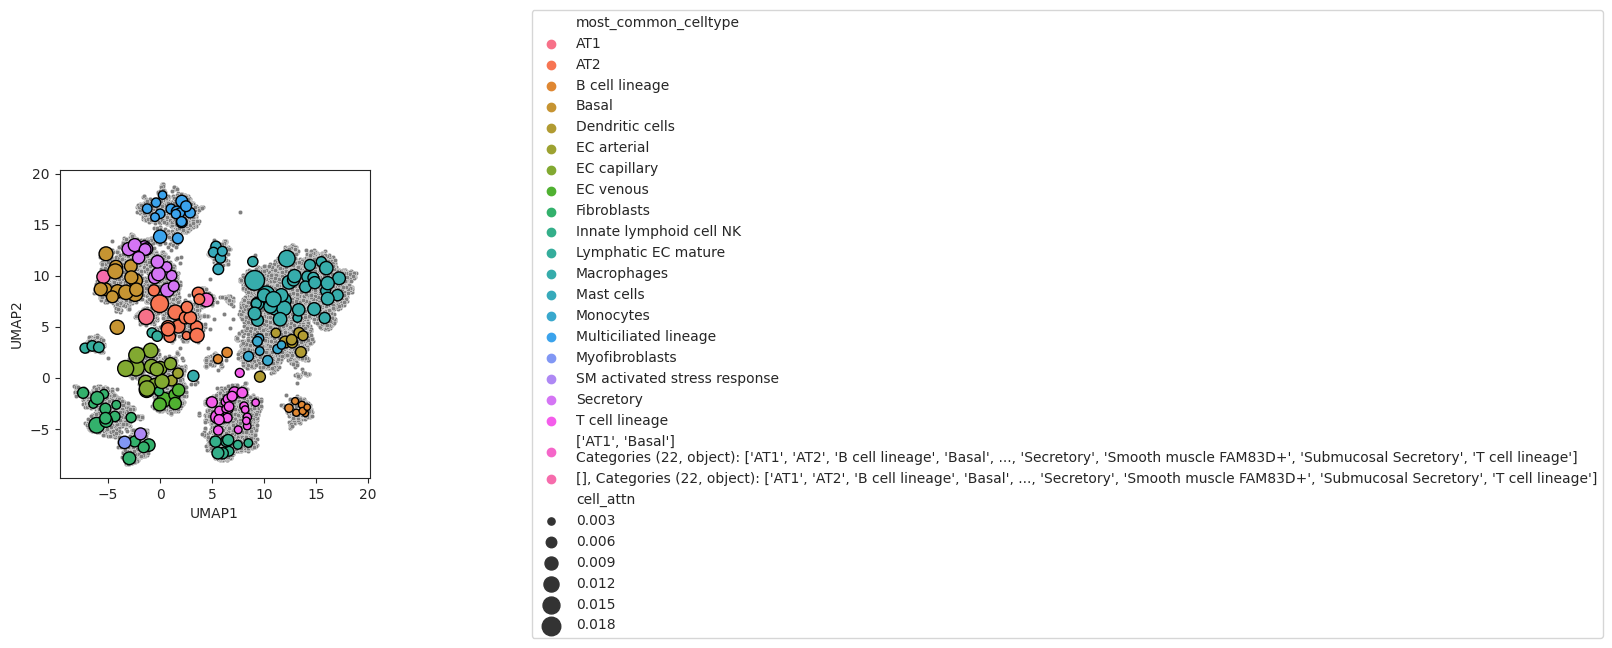

In [33]:
plot_sea_cells_celltypes_with_sizes(adata, df, 'most_common_celltype', 'cell_attn')